# Data Preparation

Fine classing and coarse classing of features for use in a Logistic Regression Model

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
%load_ext autoreload
%autoreload 2
#%reload_ext autoreload
import clockwork_orange as clockwork

Import the dataframe loan_data_2007_2014_preprocessed outputed from credit_risk_modeling_01_preprocessing.ipynb

In [3]:
loan_data_backup = pd.read_pickle("../data/loan_data_2007_2014_preprocessed.pkl")

In [4]:
loan_data = loan_data_backup.copy()

In [5]:
pd.options.display.max_columns = None

In [6]:
loan_data.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 195 columns):
 #   Column                                                           Dtype         
---  ------                                                           -----         
 0   Unnamed: 0                                                       int64         
 1   id                                                               int32         
 2   member_id                                                        int32         
 3   loan_amnt                                                        int64         
 4   funded_amnt                                                      int32         
 5   funded_amnt_inv                                                  int32         
 6   term                                                             object        
 7   int_rate                                                         float32       
 8   installment                      

# Probability of Default Model PD

### The Target Variable is Default. 

The dataset contains information on 466,285 consumer loans accounts over the period from 2004-2014. The target variable we wish to predict is the event of default, which is the non-repayment of a loan.  There are 50968 loans categorised as being in default: 

* The Good outcome is no-default, event = 1.
* The Bad outcome is default, event = 0. 

Definition. Default and Non-default Accounts.

### States of Account

There are multiple states of account in the dataset.  We will count the following states as being in a state of default: 

    * Charged Off
    * Default
    * Late (31-120 days)
    * Does not meet the credit policy. Status:Charged Off
    
A customer Loan that is in default is said to be charged off, and a bad loan provision is made on the balance sheet. (There is legal recourse for recovery, and this may happen whilst in this status).
All other states of account are considered to be in non-default.

In [7]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [8]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [9]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [10]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [11]:
defaulted = loan_data[loan_data['good_bad'] == 0]
len(defaulted)

50968

### Splitting Data

In [12]:
from sklearn.model_selection import train_test_split

We will select an 80:20 test train split and set the random seed to 42 for test train split

In [13]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

Train Shapes

In [14]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)

(373028, 195)
(373028,)


Test Shapes

In [15]:
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(93257, 195)
(93257,)


In [16]:
loan_data_inputs_train.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 195 columns):
 #   Column                                                           Dtype         
---  ------                                                           -----         
 0   Unnamed: 0                                                       int64         
 1   id                                                               int32         
 2   member_id                                                        int32         
 3   loan_amnt                                                        int64         
 4   funded_amnt                                                      int32         
 5   funded_amnt_inv                                                  int32         
 6   term                                                             object        
 7   int_rate                                                         float32       
 8   installment                 

In [17]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [18]:
df_inputs_prepr.head(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,vix_mean,vix_min,vix_max,vix_spread,year,ted_spread_mean,ted_spread_min,ted_spread_max,ted_spread_spread,nat_unemp,retail_sales,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,payment_to_inc
427211,427184,12826297,14848419,6625,6625,6625,36,15.61,231.649994,C,C5,8 years,MORTGAGE,70000,Not Verified,Mar-14,Current,n,debt_consolidation,PA,15.96,1.0,Jan-94,2.0,21.0,102.0,5.0,1.0,2387,62.8,16.0,f,3138.58,3138.58,4881.95,4881.95,3486.42,1395.53,0.0,0.0,0.0,Jan-16,248.95,Jan-16,Jan-16,0.0,34.0,0.0,122.0,22916.0,3800.0,14.84,13.88,17.82,3.94,2014-03-01,0.18,0.17,0.19,0.02,6.7,1.016863,8.0,1994-01-01,311.0,36,2014-03-01,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.971142


### 3. Data Preparation: Generating Weight of Explanation WoE  

### 3.1 Preprocessing Discrete Variables: Grade

Grade is one of the most important variables in the dataset. Grade is a personal credit rating provided via external credit reference agency.

Grade A is the highest rating - most likely to pay back, least likely to deault, lowest risk.
Grade G is the lowest rating - less likely to pay back, most likely to deault, higher risk.

The plots below show WoE increasing with grade.

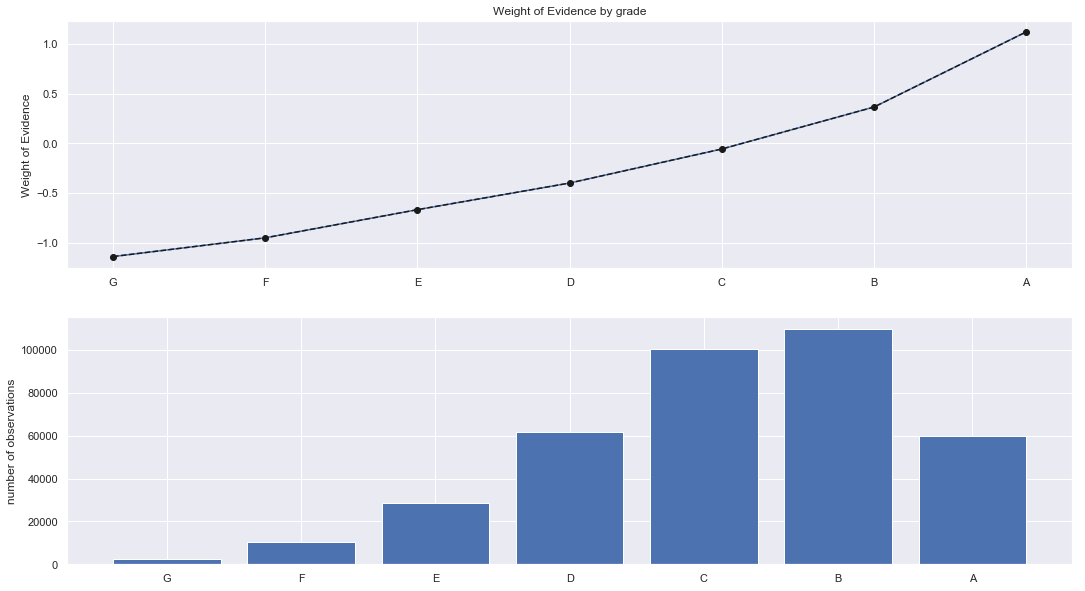

In [19]:
df_temp = clockwork.woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp
clockwork.plot_by_woe(df_temp)
# 'Grade:G' is the reference class: the class with the lowest WoE. We will allocate the reference class as the class with the lowest WoE for all features.
# This helps define the lowest scorecard value. 

#### Sub Grade

Sub grade has the same profile as Grade. We won't be able to include both in a regression as they will have very strong co-linearity. Sub Grade is an example of fine classing with many classes, so we will exclude it from our model in favour of the coarser class 'Grade'. Some of the sub grades are out of expected sequence due to small sample sizes. 

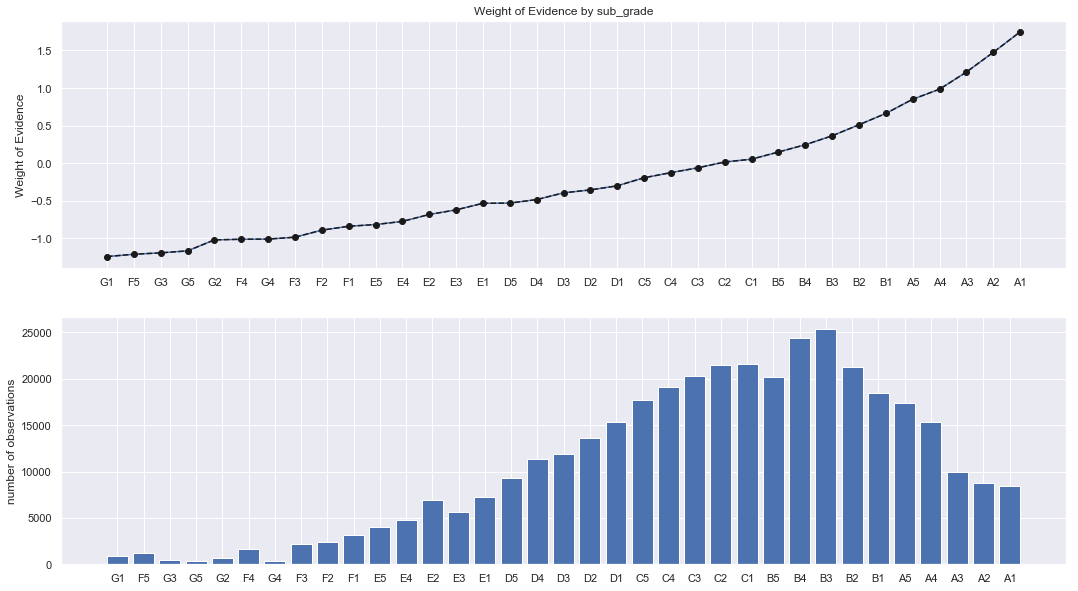

In [20]:
df_temp = clockwork.woe_discrete(df_inputs_prepr, 'sub_grade', df_targets_prepr)
df_temp
clockwork.plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Grouping Classes

### 3.2 Home Ownership
Analysis of Home Ownership, a key variable in probability of default.
We will allocate the dummy with the lowest WoE as the the reference class line with risk management prudence.
OTHER, NONE and ANY have very small sample sizes so will be grouped together as the reference class

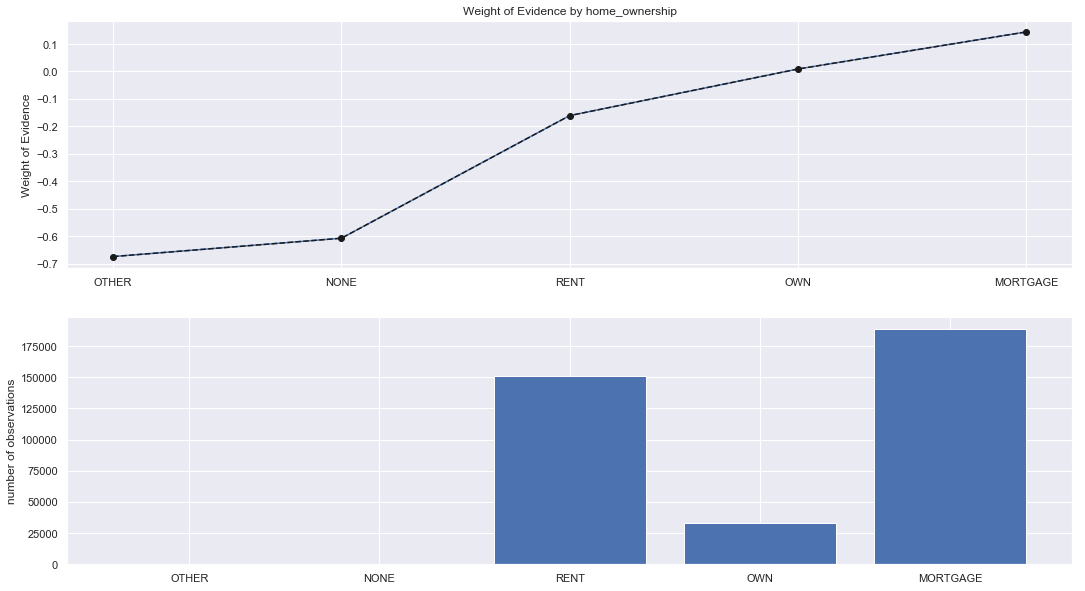

In [21]:
df_temp = clockwork.woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp
clockwork.plot_by_woe(df_temp.iloc[:5, :])

Look at the breakdown by category and number of observation. To reduce the number of dummies we would like to combine like categories where sensible.

COMBINING Rent, Other(137), None(40) as a group closest WoE, plus add Any(1) as only one observation. Very few observations.

In [22]:
df_inputs_prepr['home_ownership:RENT'] = df_inputs_prepr['home_ownership:RENT'].astype(int)
df_inputs_prepr['home_ownership:OTHER'] = df_inputs_prepr['home_ownership:OTHER'].astype(int)
df_inputs_prepr['home_ownership:NONE'] = df_inputs_prepr['home_ownership:NONE'].astype(int)
df_inputs_prepr['home_ownership:ANY'] = df_inputs_prepr['home_ownership:ANY'].astype(int)

In [23]:
# Creating a new reference category # 'RENT_OTHER_NONE_ANY'
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

### 3.3 States

It is reasonable to expect there is some relationship between a borrower's state of residence and the Probability of default.  State is not a sequential variable so we have the freedom to group the classes by similar WoE. It makes sense to leave States with a large number of borrowers such as California and NY as unique classes. 
States with less loan data should be grouped where possible. Low numbers of observations can cause extreme WoE values

In [24]:
addr_states = df_inputs_prepr['addr_state'].unique()
len(addr_states)

50

Let's group the states in the yellow block below in one class. FL the first large state so WoE value is more reliable. We also add ND to this class as there are no ND observations in the dataset, but there could be in the future. (We add to the lowest WoE group out of conservatism - it is prudent for Risk Managers to assume the lowest rating for unknowns).

In the Feature graphs below the top panel shows the WoE plot by class and the bottom panel shows the number of observations for each class within the feature. 

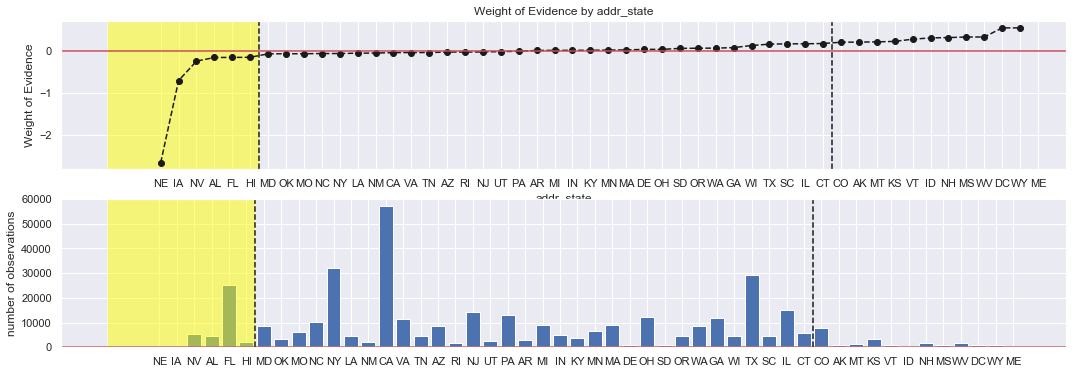

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,11,0.363636,0.000029,4.0,7.0,0.000012,0.000171,-2.654583,NaN,NaN,inf
1,IA,10,0.800000,0.000027,8.0,2.0,0.000024,0.000049,-0.708673,0.436364,1.945910,inf
2,NV,5239,0.863714,0.014045,4525.0,714.0,0.013623,0.017466,-0.248477,0.063714,0.460196,inf
3,AL,4653,0.873630,0.012474,4065.0,588.0,0.012238,0.014384,-0.161525,0.009915,0.086952,inf
4,FL,25353,0.873861,0.067965,22155.0,3198.0,0.066702,0.078231,-0.159430,0.000231,0.002096,inf
5,HI,1994,0.874122,0.005345,1743.0,251.0,0.005248,0.006140,-0.157057,0.000261,0.002373,inf
6,MD,8762,0.882903,0.023489,7736.0,1026.0,0.023291,0.025098,-0.074750,0.008781,0.082307,inf
7,OK,3268,0.883109,0.008761,2886.0,382.0,0.008689,0.009345,-0.072761,0.000205,0.001989,inf
8,MO,6067,0.883138,0.016264,5358.0,709.0,0.016131,0.017344,-0.072477,0.000029,0.000284,inf
9,NC,10154,0.883593,0.027220,8972.0,1182.0,0.027012,0.028915,-0.068066,0.000454,0.004410,inf


In [25]:
df_temp = clockwork.woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
clockwork.plot_by_woe_marker_block(df_temp, [5.5,37.5], -3, 5.5, 0)
df_temp

NE, IA & NV have relatively small observations => so group in a category with FLorida FL the first large population.
Plus HI & AL above. Include ND as there is no information on it.

North Dakota is missing from the dataset - there may be no borrowers from North Dakota, but there may be customers from North Dakota at some stage in the future, so let's create a new state dummy for ND.
We have no information on ND, but as Risk Managers we should assume the worst and group ND with worst performing states.

In [26]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

Replotting with NE & IA, NV, AL FL & HIexcluded

In [27]:
len(df_temp.iloc[6: -6, 0 ])

38

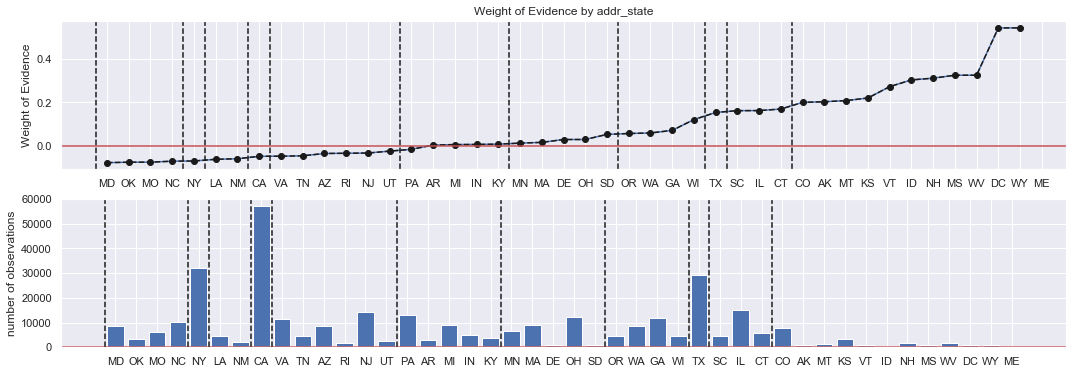

In [28]:
xposition_3 = [-0.5,3.5, 4.5, 6.5, 7.5, 13.5, 18.5, 23.5, 27.5, 28.5, 31.5]
xp3 = [ x + 0 for x in xposition_3]

clockwork.plot_by_woe_marker(df_temp.iloc[6:, : ], xp3)

#### State Groupings by WoE

We create the following categories after coarse classing:

    'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
    'MD' 'OK', 'MO', 'NC'
    'NY'
    'VA' 'TN' 'AZ' 'RI' 'NJ' 'UT'
    'CA'
    'VA' 'TN' 'AZ' 'RI' 'NJ' 'UT'
    'PA' 'AR' 'MI' 'IN' 'KY'
    
    'MN' 'MA' 'DE' 'OH' 'SD'
    'OR' 'WA' 'GA' 'WI'
    'SC' 'IL' 'CT'
    'TX'
    'CO' 'AK' 'MT' 'KS' 'VT' 
    'ID' 'NH' 'MS' 'WY' 'DC' 'WV' 'ME'

For maximum prudence 'IA_NV_HI_ID_AL_FL' will be the reference category.

In [29]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_AL_FL_HI'] = sum([df_inputs_prepr['addr_state:ND'],
                                                          df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'],
                                                          df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:AL'],
                                                          df_inputs_prepr['addr_state:FL'],
                                                          df_inputs_prepr['addr_state:HI']])

df_inputs_prepr['addr_state:MD_OK_MO_NC_LA_NM'] = sum([df_inputs_prepr['addr_state:MD'],
                                                df_inputs_prepr['addr_state:OK'],
                                                df_inputs_prepr['addr_state:MO'],
                                                df_inputs_prepr['addr_state:NC'],
                                                df_inputs_prepr['addr_state:LA'],
                                                df_inputs_prepr['addr_state:NM']])
                                        
df_inputs_prepr['addr_state:VA_TN_AZ_RI_NJ_UT'] = sum([df_inputs_prepr['addr_state:VA'],
                                                      df_inputs_prepr['addr_state:TN'],
                                                      df_inputs_prepr['addr_state:AZ'],
                                                      df_inputs_prepr['addr_state:RI'],
                                                      df_inputs_prepr['addr_state:NJ'],
                                                      df_inputs_prepr['addr_state:UT']])
                                                    
df_inputs_prepr['addr_state:PA_AR_MI_IN_KY'] = sum([df_inputs_prepr['addr_state:PA'],
                                                   df_inputs_prepr['addr_state:AR'],
                                                   df_inputs_prepr['addr_state:MI'], 
                                                   df_inputs_prepr['addr_state:IN'],
                                                   df_inputs_prepr['addr_state:KY']])

df_inputs_prepr['addr_state:MN_MA_DE_OH_SD'] = sum([df_inputs_prepr['addr_state:MN'], 
                                                    df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], 
                                                    df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:SD']])

df_inputs_prepr['addr_state:CR_WA_GA_VM'] = sum([df_inputs_prepr['addr_state:OR'],
                                                    df_inputs_prepr['addr_state:WA'],
                                                    df_inputs_prepr['addr_state:GA'], 
                                                    df_inputs_prepr['addr_state:WI']])

df_inputs_prepr['addr_state:SC_IL_CT'] = sum([df_inputs_prepr['addr_state:SC'],
                                                    df_inputs_prepr['addr_state:IL'],
                                                    df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:CO_AK_MT_KS_VT'] = sum([df_inputs_prepr['addr_state:CO'], 
                                                       df_inputs_prepr['addr_state:AK'],
                                                       df_inputs_prepr['addr_state:MT'],
                                                       df_inputs_prepr['addr_state:KS'],
                                                       df_inputs_prepr['addr_state:VT']]) 
                                                       
df_inputs_prepr['addr_state:ID_NH_MS_WY_DC_WV_ME'] = sum([df_inputs_prepr['addr_state:ID'],
                                                       df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:MS'],
                                                       df_inputs_prepr['addr_state:WY'], 
                                                       df_inputs_prepr['addr_state:DC'], 
                                                       df_inputs_prepr['addr_state:WV'],
                                                       df_inputs_prepr['addr_state:ME']])


### 3.4 Preprocessing Discrete Variables: Verification Status
There are three varification statuses verified, source verified and non verified.
Verified has the lowet WoE and will be the reference class.

In [30]:
df_temp = clockwork.woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134349,0.872355,0.360158,117200.0,17149.0,0.352854,0.419506,-0.173025,NaN,NaN,0.020724
1,Source Verified,120211,0.895575,0.322257,107658.0,12553.0,0.324126,0.307077,0.054033,0.023220,0.227058,0.020724
2,Not Verified,118468,0.905654,0.317585,107291.0,11177.0,0.323021,0.273417,0.166719,0.010079,0.112687,0.020724


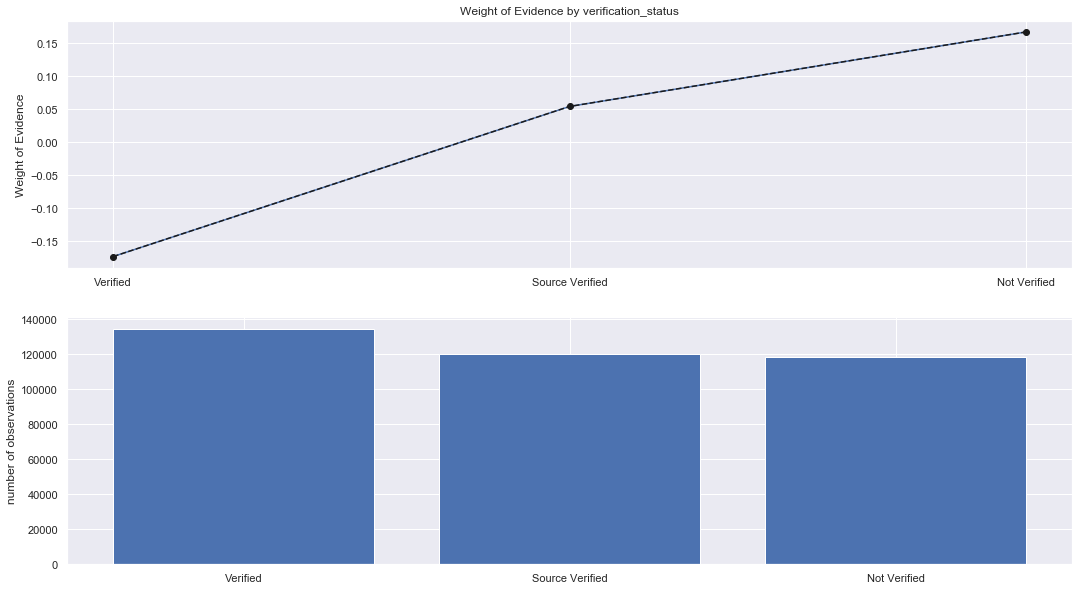

In [31]:
clockwork.plot_by_woe(df_temp)

### 3.5 Preprocessing: Loan Purpose 
Loan Purpose is a great dummy variable as it is reasonable to expect differences in default probability by loan purpose. 
Speculative purposes such as loans for small businesses intuitively attract higher risk premia. Debt consolidation and credit cards will remain as stand alone classes, the other classes are grouped.  

The reference class is education + small_business + moving + renewable energy.

In [32]:
df_temp = clockwork.woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)

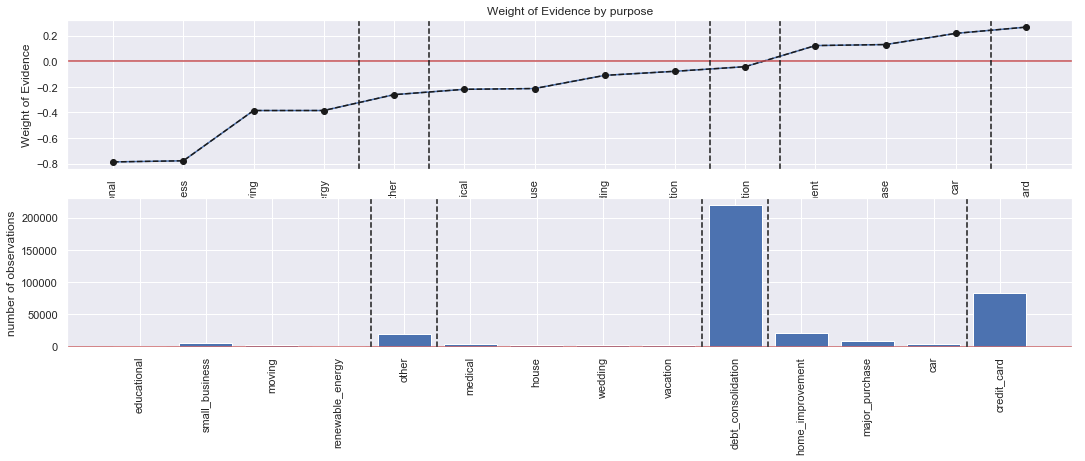

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,357,0.787115,0.000957,281.0,76.0,0.000846,0.001859,-0.787346,NaN,NaN,0.03603
1,small_business,5638,0.788578,0.015114,4446.0,1192.0,0.013386,0.029159,-0.778595,0.001463,0.008751,0.03603
2,moving,2368,0.846706,0.006348,2005.0,363.0,0.006036,0.008880,-0.385971,0.058129,0.392624,0.03603
3,renewable_energy,274,0.846715,0.000735,232.0,42.0,0.000698,0.001027,-0.385899,0.000009,0.000071,0.03603
4,other,18869,0.862102,0.050583,16267.0,2602.0,0.048975,0.063651,-0.262109,0.015387,0.123790,0.03603
5,medical,3744,0.866987,0.010037,3246.0,498.0,0.009773,0.012182,-0.220389,0.004885,0.041721,0.03603
6,house,1784,0.867713,0.004782,1548.0,236.0,0.004661,0.005773,-0.214080,0.000726,0.006309,0.03603
7,wedding,1844,0.879067,0.004943,1621.0,223.0,0.004880,0.005455,-0.111340,0.011354,0.102740,0.03603
8,vacation,1990,0.882412,0.005335,1756.0,234.0,0.005287,0.005724,-0.079495,0.003345,0.031846,0.03603
9,debt_consolidation,219040,0.886094,0.587195,194090.0,24950.0,0.584346,0.610338,-0.043519,0.003682,0.035975,0.03603


In [33]:
clockwork.plot_by_woe_marker(df_temp, [3.5, 4.5, 8.5, 9.5, 12.5],90)
df_temp

In [34]:
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'],
                                                                       df_inputs_prepr['purpose:small_business'],
                                                                       df_inputs_prepr['purpose:renewable_energy'],
                                                                       df_inputs_prepr['purpose:moving']])

df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], 
                                                     df_inputs_prepr['purpose:medical'],
                                                     df_inputs_prepr['purpose:wedding'], 
                                                     df_inputs_prepr['purpose:house'],          
                                                     df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], 
                                                              df_inputs_prepr['purpose:car'],
                                                              df_inputs_prepr['purpose:home_improvement']])

### 3.6 Initial List
Initial list is a binary variable with two options W & F

F is the reference class

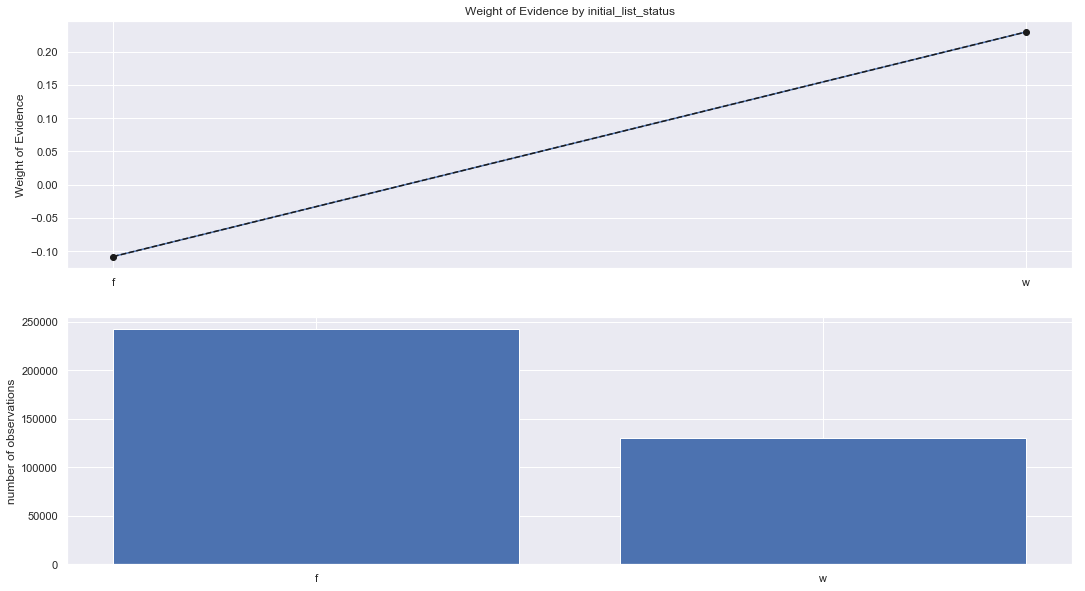

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242429,0.879383,0.649895,213188.0,29241.0,0.641844,0.715306,-0.108365,NaN,NaN,0.024824
1,w,130599,0.910888,0.350105,118961.0,11638.0,0.358156,0.284694,0.229553,0.031504,0.337918,0.024824


In [35]:
df_temp = clockwork.woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
clockwork.plot_by_woe(df_temp)
df_temp

In [36]:
df_inputs_prepr['initial_list_status:w'] = df_inputs_prepr['initial_list_status:w'].astype(int)
df_inputs_prepr['initial_list_status:f'] = df_inputs_prepr['initial_list_status:f'].astype(int)

### 2.0 Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

Qualitatively different for discrete variables. Discrete categorical variable have no concept of order as they are different things. Can be ordered by WoE.
Income for example has an order. Continuous variables are ordered by magnitude, so can't be ordered by WoE

### 3.7 Loan Term:
Loan Term: Simple case with just two loan term 36 & 60 months.
60 month loans have the lower WoE so they will be the reference class in this category.

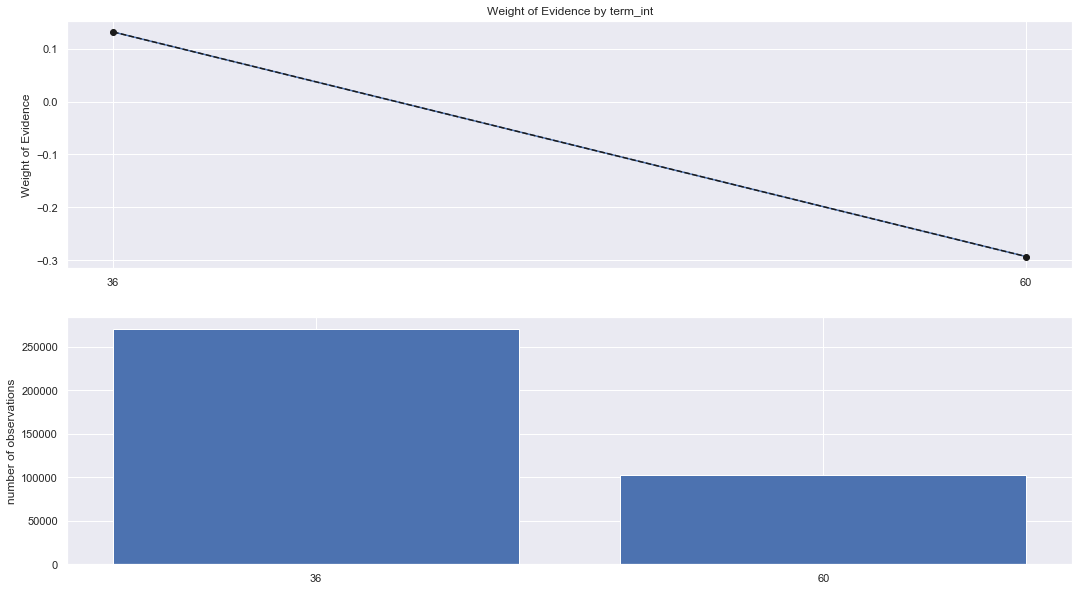

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270152,0.902596,0.724214,243838.0,26314.0,0.734122,0.643705,0.131436,NaN,NaN,0.038352
1,60,102876,0.858422,0.275786,88311.0,14565.0,0.265878,0.356295,-0.292724,0.044174,0.42416,0.038352


In [37]:
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
clockwork.plot_by_woe(df_temp)
df_temp

As it has a the lowest WoE '60' will be the reference category for term.

In [38]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

### 3.8 Employment Length
Employment length is split into 11 categories in the dataset.
Categories 0, 1 and 10 will stay unique, and the remaining classes grouped into 3 classes. 
Borrowers with the 0 years in employment have the lowest WoE, so 0 is the reference class.

In [39]:
df_inputs_prepr['emp_length_int'].unique()

array([ 8.,  6.,  7.,  9.,  3.,  0.,  5., 10.,  2.,  4.,  1.])

In [40]:
df_inputs_prepr['vix_max']

427211    17.82
206088    18.96
136020    16.30
412305    17.03
36159     30.69
          ...  
259178    14.89
365838    12.65
131932    20.49
146867    17.56
121958    16.44
Name: vix_max, Length: 373028, dtype: float64

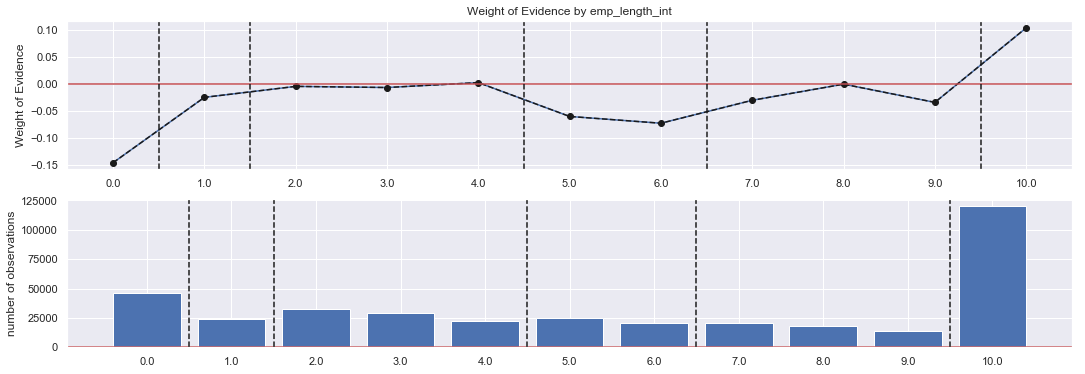

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45810,0.875442,0.122806,40104.0,5706.0,0.120741,0.139583,-0.145009,NaN,NaN,0.006766
1,1.0,23737,0.888023,0.063633,21079.0,2658.0,0.063462,0.065021,-0.024264,0.012581,0.120745,0.006766
2,2.0,32989,0.890024,0.088436,29361.0,3628.0,0.088397,0.088750,-0.003981,0.002001,0.020282,0.006766
3,3.0,29034,0.889819,0.077833,25835.0,3199.0,0.077781,0.078255,-0.006075,0.000205,0.002094,0.006766
4,4.0,22526,0.890704,0.060387,20064.0,2462.0,0.060407,0.060227,0.002986,0.000885,0.009061,0.006766
5,5.0,24702,0.884463,0.066220,21848.0,2854.0,0.065778,0.069816,-0.059579,0.006241,0.062565,0.006766
6,6.0,20946,0.883176,0.056151,18499.0,2447.0,0.055695,0.059860,-0.072113,0.001287,0.012534,0.006766
7,7.0,20939,0.887483,0.056133,18583.0,2356.0,0.055948,0.057634,-0.029685,0.004307,0.042428,0.006766
8,8.0,17997,0.890426,0.048246,16025.0,1972.0,0.048246,0.048240,0.000135,0.002943,0.029820,0.006766
9,9.0,14189,0.887096,0.038037,12587.0,1602.0,0.037896,0.039189,-0.033555,0.003331,0.033690,0.006766


In [41]:
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
markers_4 = [0.5, 1.5, 4.5, 6.5,9.5]
clockwork.plot_by_woe_marker(df_temp, markers_4)
df_temp

Borrowers with 0 months of employment are the most risky category, so this will be our base case

In [42]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### 3.9 Months since issued factor
This a continuous variable that represents the "MONTHS SINCE ISSUED" with over 100 distinct values. 
We could take each one as a categorical but it's neater to group these. The pandas function "pd.cut(Series, number of categories)" is used for this.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

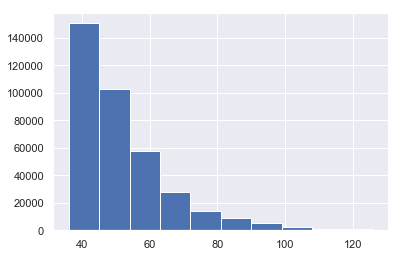

In [43]:
df_inputs_prepr['mths_since_issue_d'].hist()

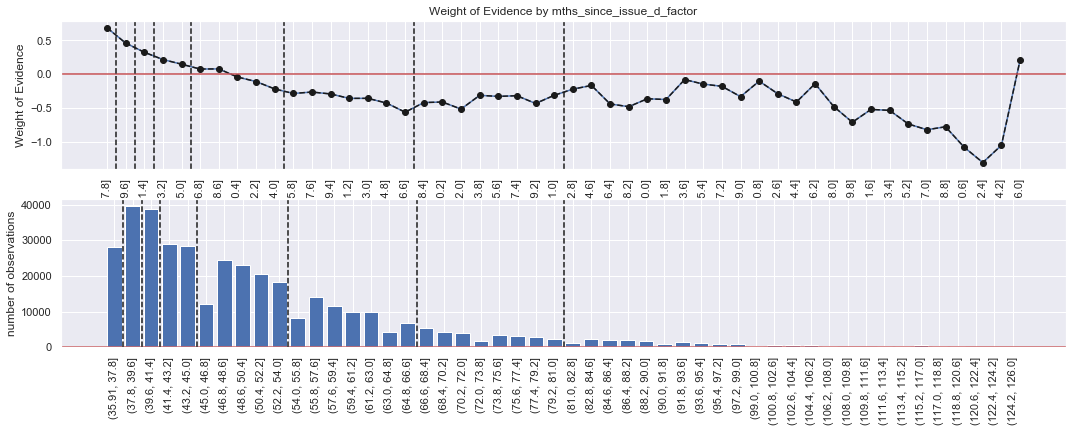

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28178,0.941621,0.075539,26533.0,1645.0,0.079883,0.040241,0.685682,NaN,NaN,0.114661
1,"(37.8, 39.6]",39602,0.927908,0.106164,36747.0,2855.0,0.110634,0.069840,0.460018,0.013713,0.225664,0.114661
2,"(39.6, 41.4]",38636,0.918289,0.103574,35479.0,3157.0,0.106817,0.077228,0.324352,0.009619,0.135666,0.114661
3,"(41.4, 43.2]",29044,0.909861,0.077860,26426.0,2618.0,0.079561,0.064043,0.216971,0.008428,0.107381,0.114661
4,"(43.2, 45.0]",28364,0.904033,0.076037,25642.0,2722.0,0.077200,0.066587,0.147898,0.005828,0.069073,0.114661


In [44]:
df_inputs_prepr_temp = []
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [0.5,1.5, 2.5, 4.5, 9.5, 16.5, 24.5], 90)
df_temp.head()

In [45]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

### 3.10 Interest Rate

The interest rate is the price charged to the customer for the loan.  It is a continuous variable.
As the interst rate increases we would expect the probability of default to increase.
(Risky customers may have been charged a high rate on their loans. Higher rates also make it more difficult to payback the loans). 

Interest rate is an indicator of default and can be a cause of it too as r gets large.  Customers with poor credit scores may only be offered higher rate loans, so interest rate may be an indicitor of prior credit scores. (Wrong way risk).

It's worth noting that the training set covers the period 2007-2014 during which the economy transitioned from a normal interest rate environment to a low interest rate environment. It may be worth expressing interest rates as a spread over Fed Funds to get around this time component.

It can be seen below that the WoE is steadily decreases as interest rate increases (inline with expectation as servicing costs increase). The graphic relationship appears monotonic.

'int_rate:>20.281' is the reference class.

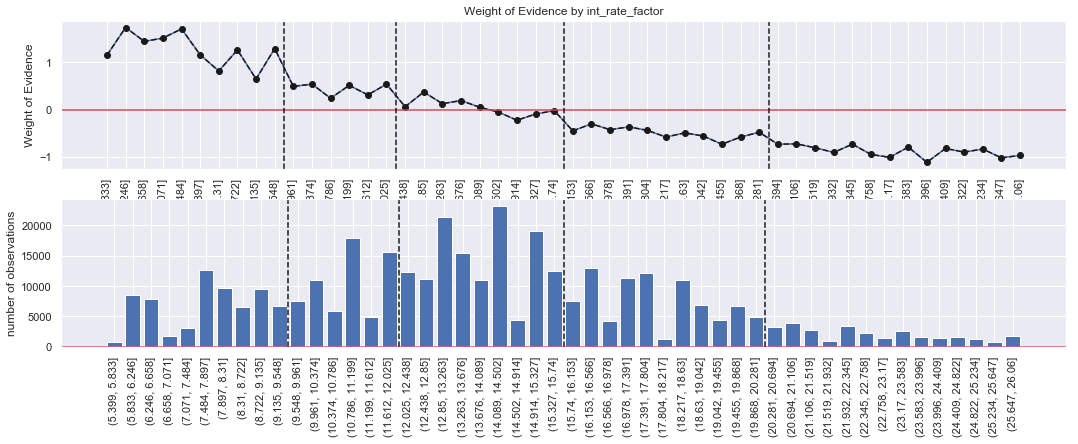

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",803,0.962640,0.002153,773.0,30.0,0.002327,0.000734,1.154114,NaN,NaN,0.348023
1,"(5.833, 6.246]",8470,0.978867,0.022706,8291.0,179.0,0.024962,0.004379,1.740573,0.016226,0.586458,0.348023
2,"(6.246, 6.658]",7846,0.971833,0.021033,7625.0,221.0,0.022957,0.005406,1.446058,0.007034,0.294515,0.348023
3,"(6.658, 7.071]",1824,0.973684,0.004890,1776.0,48.0,0.005347,0.001174,1.515951,0.001851,0.069893,0.348023
4,"(7.071, 7.484]",3127,0.978254,0.008383,3059.0,68.0,0.009210,0.001663,1.711368,0.004570,0.195418,0.348023


In [46]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [9.5,15.5,24.5, 35.5], 90)
df_temp.head()

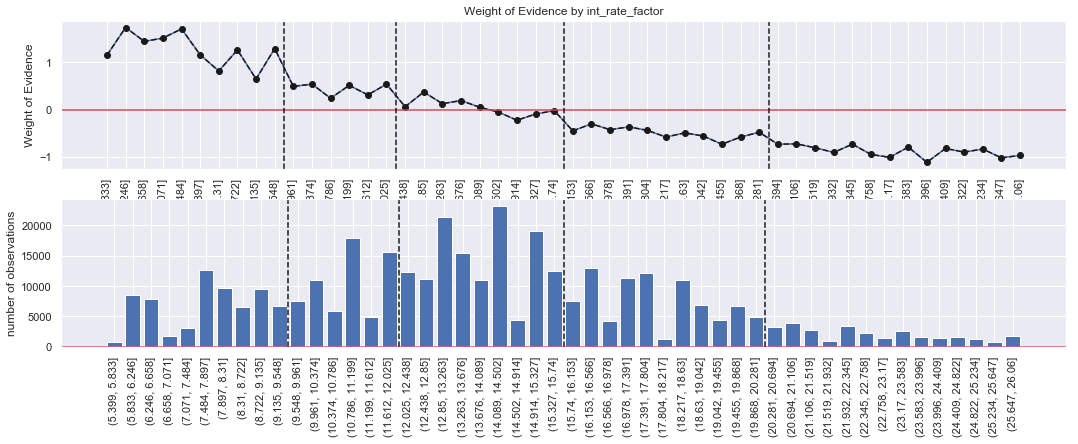

In [47]:
clockwork.plot_by_woe_marker(df_temp, [9.5,15.5,24.5, 35.5], 90)

#### Coarse Classing of interest rate into the following buckets / bins

In [48]:
df_inputs_prepr['int_rate:<=9.5'] = np.where((df_inputs_prepr['int_rate'] <= 9.5), 1, 0)
df_inputs_prepr['int_rate:9.5-12.0'] = np.where((df_inputs_prepr['int_rate'] > 9.5) & (df_inputs_prepr['int_rate'] <= 12.0), 1, 0)
df_inputs_prepr['int_rate:12.0-15.75'] = np.where((df_inputs_prepr['int_rate'] > 12.0) & (df_inputs_prepr['int_rate'] <= 15.75), 1, 0)
df_inputs_prepr['int_rate:15.75-20.25'] = np.where((df_inputs_prepr['int_rate'] > 15.75) & (df_inputs_prepr['int_rate'] <= 20.25), 1, 0)
df_inputs_prepr['int_rate:>20.25'] = np.where((df_inputs_prepr['int_rate'] > 20.25), 1, 0)

### 3.11 Funded Amount Factor

This represents the amount of the loan facility utilised

In [49]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 20)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)

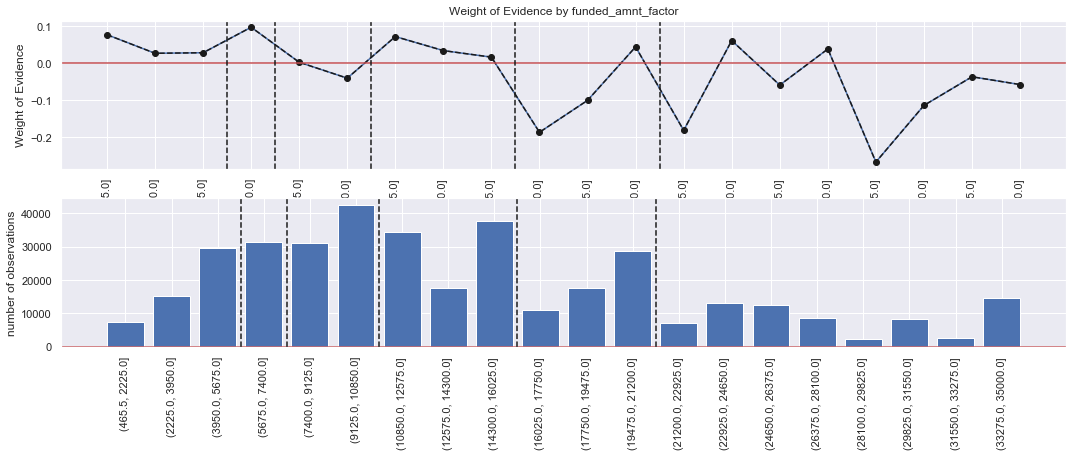

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 2225.0]",7358,0.897662,0.019725,6605.0,753.0,0.019886,0.018420,0.076550,NaN,NaN,0.005358
1,"(2225.0, 3950.0]",15049,0.892950,0.040343,13438.0,1611.0,0.040458,0.039409,0.026264,0.004713,0.050286,0.005358
2,"(3950.0, 5675.0]",29520,0.893089,0.079136,26364.0,3156.0,0.079374,0.077203,0.027727,0.000140,0.001463,0.005358
3,"(5675.0, 7400.0]",31271,0.899492,0.083830,28128.0,3143.0,0.084685,0.076885,0.096621,0.006402,0.068894,0.005358
4,"(7400.0, 9125.0]",31081,0.890608,0.083321,27681.0,3400.0,0.083339,0.083172,0.002004,0.008883,0.094617,0.005358


In [50]:
clockwork.plot_by_woe_marker(df_temp, [2.5, 3.5,5.5,8.5, 11.5], 90)
df_temp.head()

In [51]:
df_inputs_prepr['funded_amnt:<5675'] = np.where((df_inputs_prepr['funded_amnt'] < 5675), 1, 0)
df_inputs_prepr['funded_amnt:5675-7400'] = np.where((df_inputs_prepr['funded_amnt'] > 5675) & (df_inputs_prepr['funded_amnt'] < 7400), 1, 0)
df_inputs_prepr['funded_amnt:7400-10850'] = np.where((df_inputs_prepr['funded_amnt'] > 10850) & (df_inputs_prepr['funded_amnt'] < 16025), 1, 0)
df_inputs_prepr['funded_amnt:10850-16025'] = np.where((df_inputs_prepr['funded_amnt'] > 16025) & (df_inputs_prepr['funded_amnt'] <= 21200), 1, 0)
df_inputs_prepr['funded_amnt:>16025'] = np.where((df_inputs_prepr['funded_amnt'] > 21200), 1, 0)

### 3.12 Months since Earliest Credit Line

Months since the earliest credit line.  We expect customers with a londer credit history to be less likely to default?

Reference class is 'mths_since_earliest_cr_line:<145'.

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


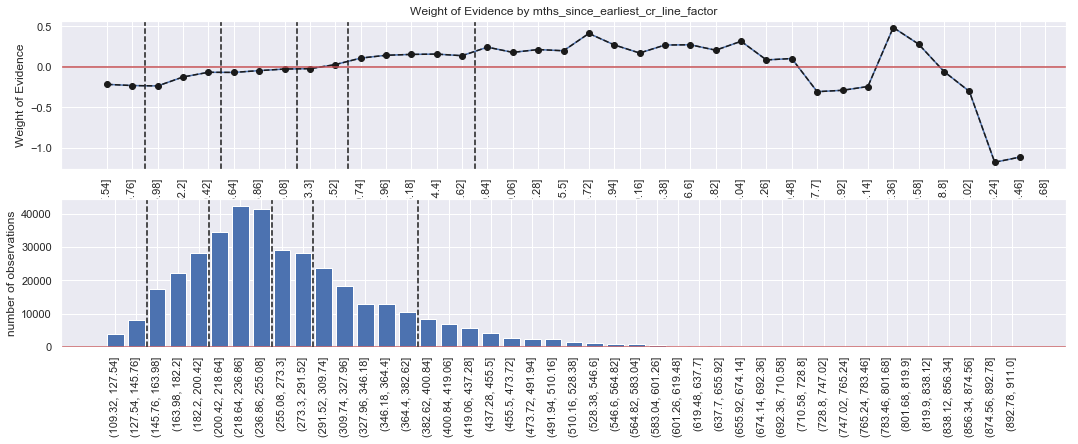

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.911, 18.22]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000073,-0.149057,NaN,NaN,inf
1,"(18.22, 36.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(36.44, 54.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(54.66, 72.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(72.88, 91.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(91.1, 109.32]",1162,0.902754,0.003115,1049.0,113.0,0.003158,0.002764,0.133238,NaN,NaN,inf
6,"(109.32, 127.54]",3870,0.867442,0.010375,3357.0,513.0,0.010107,0.012549,-0.216440,0.035312,0.349678,inf
7,"(127.54, 145.76]",7945,0.865702,0.021299,6878.0,1067.0,0.020708,0.026101,-0.231490,0.001740,0.015050,inf
8,"(145.76, 163.98]",17357,0.865184,0.046530,15017.0,2340.0,0.045212,0.057242,-0.235935,0.000518,0.004445,inf
9,"(163.98, 182.2]",22113,0.877538,0.059280,19405.0,2708.0,0.058423,0.066244,-0.125647,0.012354,0.110288,inf


In [52]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp.iloc[6: , : ], [1.5, 4.5, 7.5, 9.5, 14.5], 90)
df_temp

In [53]:
df_inputs_prepr['mths_since_earliest_cr_line:<145'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(145)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:145-182'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(145, 182)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:182-255'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(182, 255)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:255-292'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(255, 292)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:292-382'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(292, 382)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>382'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(382, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

### 3.12 Delinquent 2 Years: delinq_2yrs

Late payments: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
Delinquent should be bad..... 

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


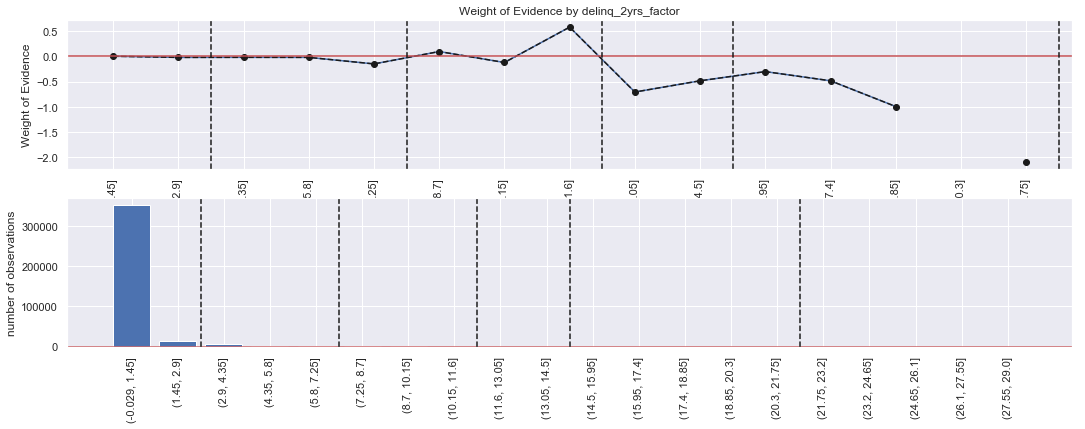

,delinq_2yrs_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.029, 1.45]",351367,0.890582,0.941932,312921.0,38446.0,0.942110,0.940483,0.001729,NaN,NaN,inf
1,"(1.45, 2.9]",13095,0.888278,0.035105,11632.0,1463.0,0.035020,0.035789,-0.021696,0.002304,0.023425,inf
2,"(2.9, 4.35]",6453,0.888424,0.017299,5733.0,720.0,0.017260,0.017613,-0.020224,0.000146,0.001472,inf
3,"(4.35, 5.8]",976,0.888320,0.002616,867.0,109.0,0.002610,0.002666,-0.021276,0.000104,0.001052,inf
4,"(5.8, 7.25]",751,0.874834,0.002013,657.0,94.0,0.001978,0.002299,-0.150578,0.013486,0.129302,inf
5,"(7.25, 8.7]",149,0.899329,0.000399,134.0,15.0,0.000403,0.000367,0.094822,0.024495,0.245400,inf
6,"(8.7, 10.15]",131,0.877863,0.000351,115.0,16.0,0.000346,0.000391,-0.122624,0.021466,0.217446,inf
7,"(10.15, 11.6]",31,0.935484,0.000083,29.0,2.0,0.000087,0.000049,0.579181,0.057621,0.701805,inf
8,"(11.6, 13.05]",45,0.800000,0.000121,36.0,9.0,0.000108,0.000220,-0.708673,0.135484,1.287854,inf
9,"(13.05, 14.5]",6,0.833333,0.000016,5.0,1.0,0.000015,0.000024,-0.485529,0.033333,0.223144,inf


In [54]:
df_inputs_prepr['delinq_2yrs_factor'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 20)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [1.5, 4.5, 7.5, 9.5, 14.5], 90)
df_temp.head(10)

In [55]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] < 1), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] > 1) & (df_inputs_prepr['delinq_2yrs'] < 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] > 3), 1, 0)

### 3.13 Inquiries in the last 6 months: inq_last_6mths
Loan enquiries made by the customer in the last 6 months. Many inquiries a sign of distress.

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


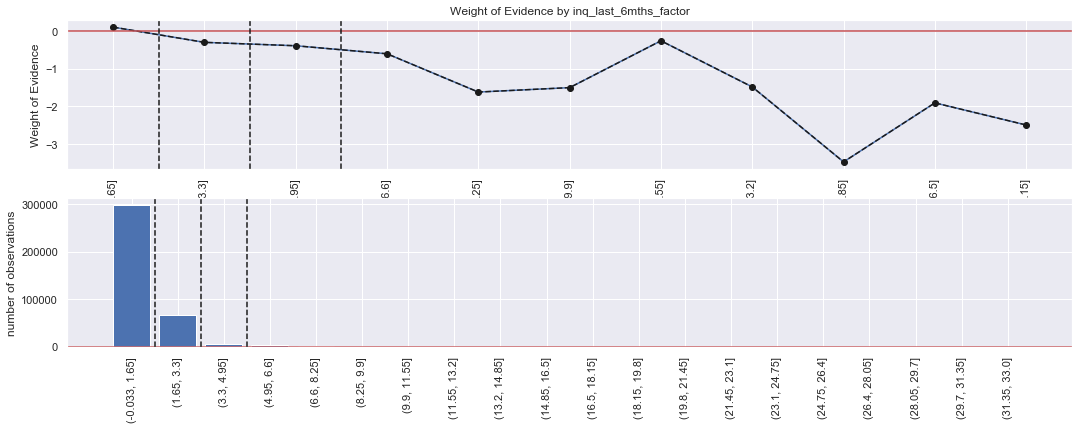

,inq_last_6mths_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.033, 1.65]",297450,0.899849,0.797393,267660.0,29790.0,0.805843,0.728736,0.100578,NaN,NaN,inf
1,"(1.65, 3.3]",66201,0.857057,0.177469,56738.0,9463.0,0.170821,0.231488,-0.303912,0.042792,0.404490,inf
2,"(3.3, 4.95]",5816,0.845598,0.015591,4918.0,898.0,0.014807,0.021967,-0.394480,0.011458,0.090568,inf
3,"(4.95, 6.6]",3184,0.815641,0.008536,2597.0,587.0,0.007819,0.014359,-0.607880,0.029958,0.213400,inf
4,"(6.6, 8.25]",260,0.615385,0.000697,160.0,100.0,0.000482,0.002446,-1.624964,0.200256,1.017084,inf
5,"(8.25, 9.9]",42,0.642857,0.000113,27.0,15.0,0.000081,0.000367,-1.507181,0.027473,0.117783,inf


In [56]:
df_inputs_prepr['inq_last_6mths_factor'] = pd.cut(df_inputs_prepr['inq_last_6mths'], 20)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [0.5,1.5, 2.5], 90)
df_temp.head(6)

In [57]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] == 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3'] = np.where((df_inputs_prepr['inq_last_6mths'] == 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>4'] = np.where((df_inputs_prepr['inq_last_6mths'] > 4), 1, 0)

### 3.14 Open Account: open_acc
The number of open credit lines in the borrower's credit file.

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


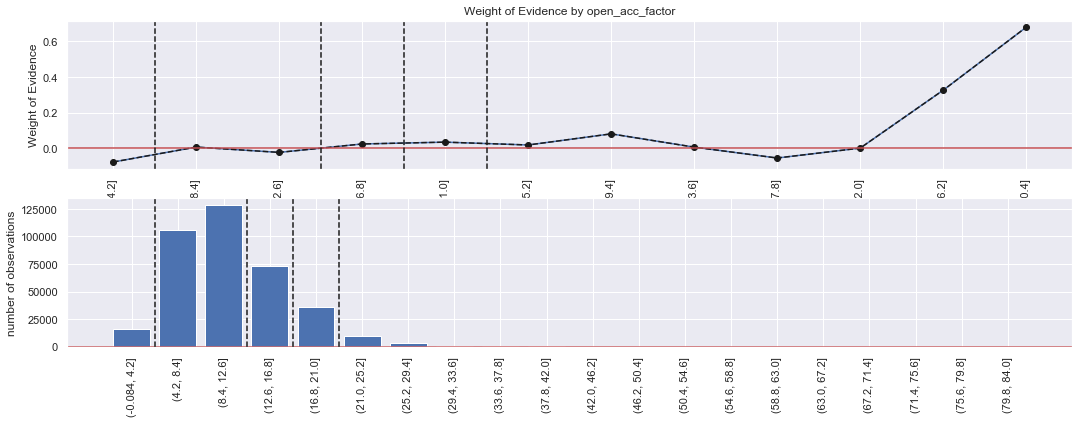

,open_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.084, 4.2]",16073,0.882723,0.043088,14188.0,1885.0,0.042716,0.046112,-0.076498,NaN,NaN,inf
1,"(4.2, 8.4]",105499,0.891108,0.282818,94011.0,11488.0,0.283039,0.281024,0.007142,0.008385,0.083640,inf
2,"(8.4, 12.6]",128111,0.888191,0.343435,113787.0,14324.0,0.342578,0.350400,-0.022575,0.002917,0.029717,inf
3,"(12.6, 16.8]",73312,0.892787,0.196532,65452.0,7860.0,0.197056,0.192275,0.024563,0.004596,0.047139,inf
4,"(16.8, 21.0]",35863,0.893762,0.096140,32053.0,3810.0,0.096502,0.093202,0.034794,0.000975,0.010231,inf
5,"(21.0, 25.2]",9336,0.892245,0.025028,8330.0,1006.0,0.025079,0.024609,0.018914,0.001517,0.015880,inf
6,"(25.2, 29.4]",3022,0.898081,0.008101,2714.0,308.0,0.008171,0.007534,0.081112,0.005836,0.062198,inf
7,"(29.4, 33.6]",1065,0.891080,0.002855,949.0,116.0,0.002857,0.002838,0.006851,0.007001,0.074260,inf
8,"(33.6, 37.8]",461,0.885033,0.001236,408.0,53.0,0.001228,0.001297,-0.053992,0.006047,0.060843,inf
9,"(37.8, 42.0]",201,0.890547,0.000539,179.0,22.0,0.000539,0.000538,0.001376,0.005515,0.055368,inf


In [58]:
df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'], 20)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [0.5,2.5, 3.5, 4.5], 90)
df_temp.head(10)

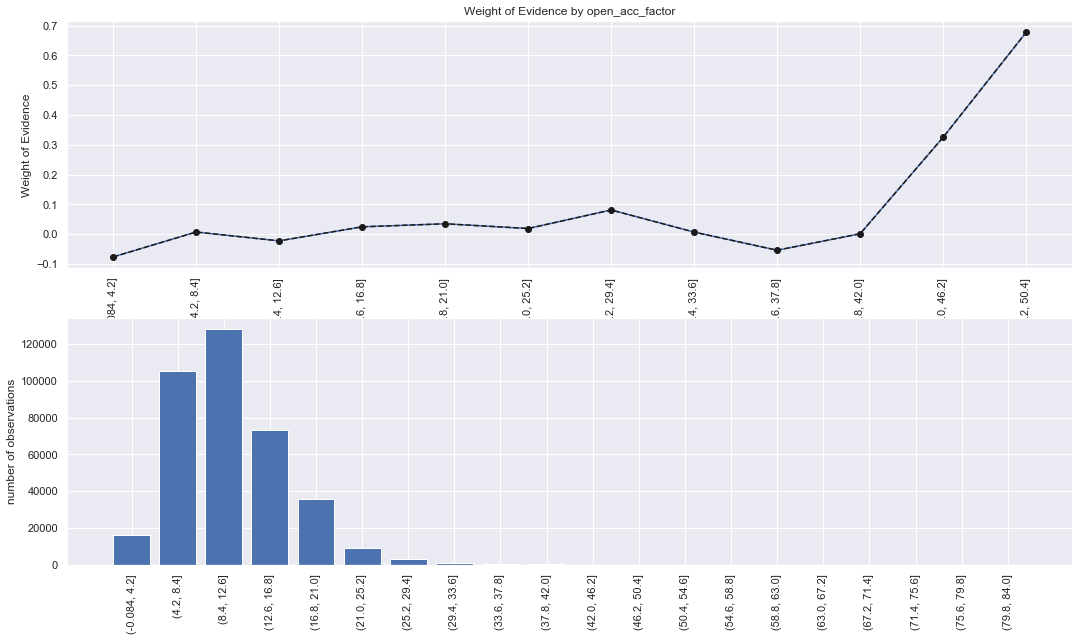

In [59]:
clockwork.plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [60]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

### 3.15 pub_rec
Public Records: Number of derogatory public records.
Clustered around 0 & 1 year.

The reference category is 'pub_rec:>4'

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


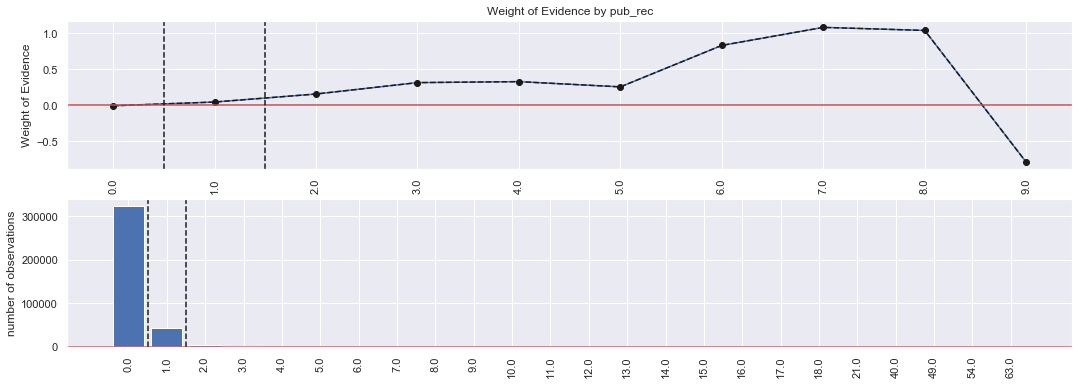

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,324069,0.889483,0.868752,288254.0,35815.0,0.867845,0.876122,-0.009492,NaN,NaN,inf
1,1.0,42285,0.894478,0.113356,37823.0,4462.0,0.113874,0.109151,0.042353,0.004995,0.051845,inf
2,2.0,4506,0.904572,0.012080,4076.0,430.0,0.012272,0.010519,0.154119,0.010094,0.111766,inf
3,3.0,1296,0.917438,0.003474,1189.0,107.0,0.003580,0.002617,0.313072,0.012867,0.158953,inf
4,4.0,417,0.918465,0.001118,383.0,34.0,0.001153,0.000832,0.326707,0.001027,0.013635,inf


In [61]:
df_inputs_prepr['pub_rec_factor'] = pd.cut(df_inputs_prepr['pub_rec'], 20)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [0.5, 1.5], 90)
df_temp.head()

In [62]:
df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] >= 0),1,0) 
df_inputs_prepr['pub_rec:1'] = np.where((df_inputs_prepr['pub_rec'] == 1),1,0) 
df_inputs_prepr['pub_rec:2'] = np.where((df_inputs_prepr['pub_rec'] == 2), 1, 0)
df_inputs_prepr['pub_rec:>2'] = np.where((df_inputs_prepr['pub_rec'] > 2),1,0)

### 13.6 Total_Accounts
The total number of credit lines currently in the borrower's credit file
The reference category is 'total_acc:<=5'

In [63]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 30)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 5.2]",3631,0.854586,0.009734,3103.0,528.0,0.009342,0.012916,-0.323939,NaN,NaN,inf
1,"(5.2, 10.4]",25210,0.873860,0.067582,22030.0,3180.0,0.066326,0.077791,-0.159443,0.019274,0.164496,inf
2,"(10.4, 15.6]",51502,0.882451,0.138065,45448.0,6054.0,0.136830,0.148096,-0.079118,0.008592,0.080326,inf
3,"(15.6, 20.8]",65719,0.886928,0.176177,58288.0,7431.0,0.175488,0.181780,-0.035231,0.004477,0.043886,inf
4,"(20.8, 26.0]",78567,0.892296,0.210620,70105.0,8462.0,0.211065,0.207001,0.019441,0.005368,0.054673,inf
5,"(26.0, 31.2]",52269,0.895732,0.140121,46819.0,5450.0,0.140958,0.133320,0.055706,0.003436,0.036265,inf
6,"(31.2, 36.4]",37469,0.897409,0.100446,33625.0,3844.0,0.101235,0.094034,0.073789,0.001677,0.018083,inf
7,"(36.4, 41.6]",24455,0.900838,0.065558,22030.0,2425.0,0.066326,0.059321,0.111606,0.003430,0.037817,inf
8,"(41.6, 46.8]",15292,0.897463,0.040994,13724.0,1568.0,0.041319,0.038357,0.074378,0.003376,0.037228,inf
9,"(46.8, 52.0]",9909,0.898274,0.026564,8901.0,1008.0,0.026798,0.024658,0.083228,0.000812,0.008850,inf


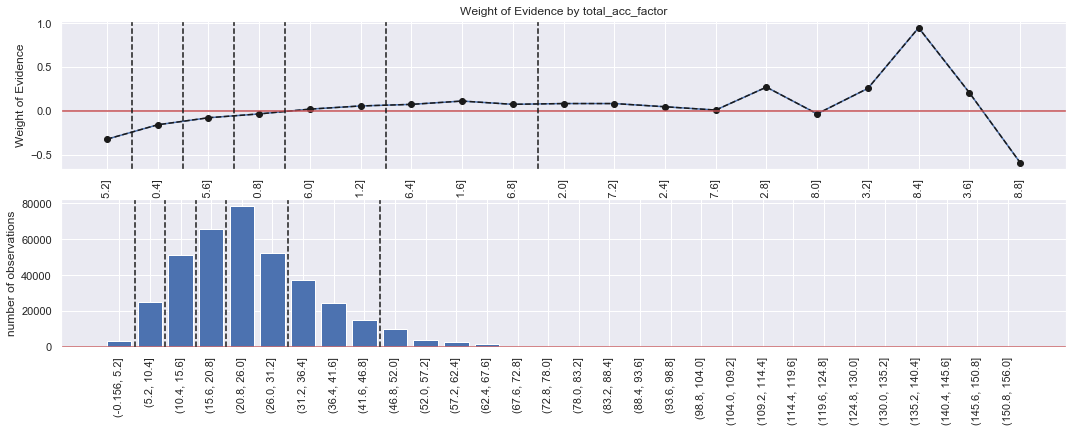

In [64]:
clockwork.plot_by_woe_marker(df_temp, [0.5,1.5,2.5,3.5,5.5,8.5], 90)

In [65]:
df_inputs_prepr['total_acc:<=5'] = np.where((df_inputs_prepr['total_acc'] <= 5), 1, 0)
df_inputs_prepr['total_acc:5-10'] = np.where((df_inputs_prepr['total_acc'] > 5) & (df_inputs_prepr['total_acc'] <= 10), 1, 0)
df_inputs_prepr['total_acc:10-15'] = np.where((df_inputs_prepr['total_acc'] > 10) & (df_inputs_prepr['total_acc'] <= 15), 1, 0)
df_inputs_prepr['total_acc:16-20'] = np.where((df_inputs_prepr['total_acc'] > 15) & (df_inputs_prepr['total_acc'] <= 20), 1, 0)
df_inputs_prepr['total_acc:20-31'] = np.where((df_inputs_prepr['total_acc'] > 20) & (df_inputs_prepr['total_acc'] <= 31), 1, 0)
df_inputs_prepr['total_acc:32-47'] = np.where((df_inputs_prepr['total_acc'] > 31) & (df_inputs_prepr['total_acc'] <= 47), 1, 0)
df_inputs_prepr['total_acc:>47'] = np.where((df_inputs_prepr['total_acc'] >= 47), 1, 0)

### 3.17 acc_now_delinq

Account now Delinquent: The number of accounts on which the borrower is now delinquent.
The reference category is: 'acc_now_delinq:>=1'

In [66]:
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371656,0.890391,0.996322,330919.0,40737.0,0.996297,0.996526,-0.000230,NaN,NaN,inf
1,1.0,1283,0.896337,0.003439,1150.0,133.0,0.003462,0.003254,0.062201,0.005946,0.062431,inf
2,2.0,76,0.907895,0.000204,69.0,7.0,0.000208,0.000171,0.193229,0.011558,0.131028,inf
3,3.0,8,0.875000,0.000021,7.0,1.0,0.000021,0.000024,-0.149057,0.032895,0.342286,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.125000,inf,inf
5,5.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000024,-inf,1.000000,inf,inf


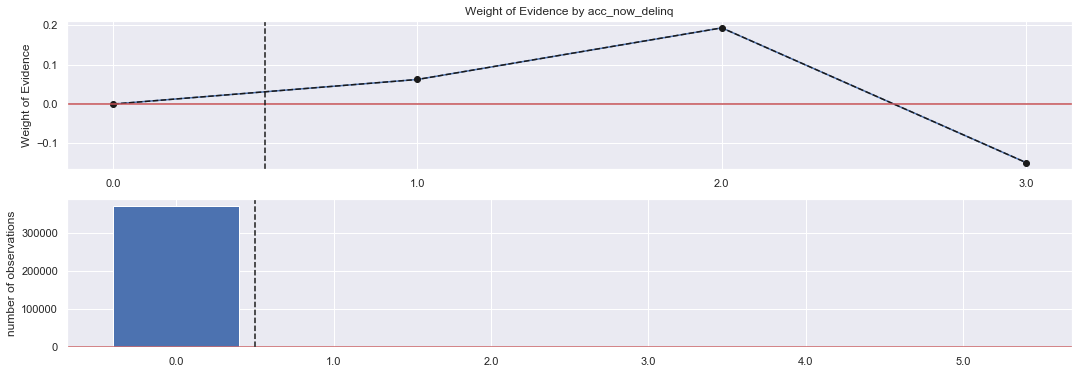

In [67]:
clockwork.plot_by_woe_marker(df_temp, [0.5])

In [68]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

### 3.18 total_rev_hi_lim
Total Revolving Credit Limit.

In [69]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 4000)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 2500.0]",4708,0.849193,0.012621,3998.0,710.0,0.012037,0.017368,-0.366683,NaN,NaN,inf
1,"(2500.0, 5000.0]",14823,0.870809,0.039737,12908.0,1915.0,0.038862,0.046846,-0.186838,0.021616,0.179845,inf
2,"(5000.0, 7499.999]",25478,0.873891,0.068301,22265.0,3213.0,0.067033,0.078598,-0.159156,0.003082,0.027681,inf
3,"(7499.999, 9999.999]",27253,0.876454,0.073059,23886.0,3367.0,0.071914,0.082365,-0.135697,0.002563,0.023460,inf
4,"(9999.999, 12499.999]",32698,0.877852,0.087656,28704.0,3994.0,0.086419,0.097703,-0.122724,0.001398,0.012973,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"(9987499.001, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3996,"(9989999.001, 9992499.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3997,"(9992499.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3998,"(9994999.0, 9997499.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


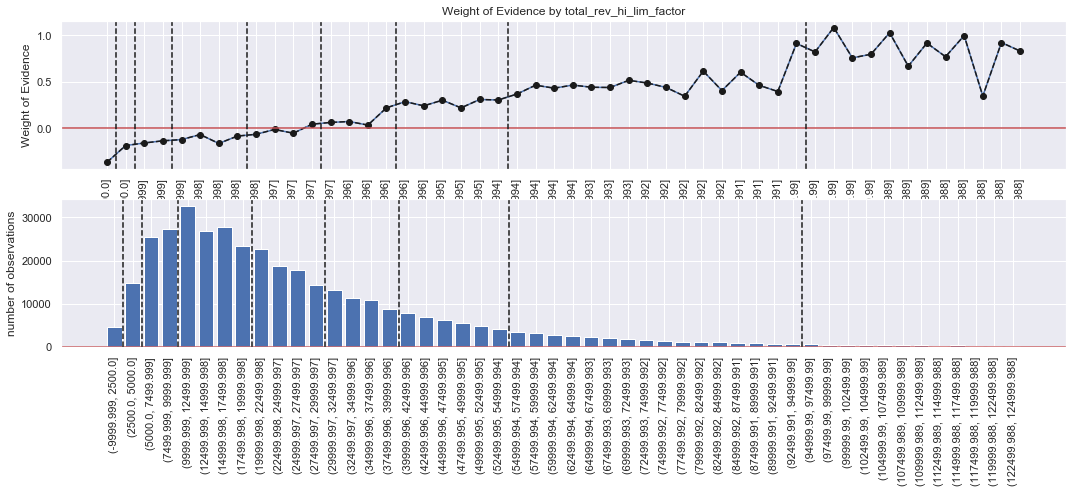

In [70]:
clockwork.plot_by_woe_marker(df_temp.iloc[: 50, : ], [0.5,1.5,3.5,7.5,11.5,15.5,21.5,37.5], 90)

In [71]:
df_inputs_prepr['total_rev_hi_lim:<=2.5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 2500), 1, 0)
df_inputs_prepr['total_rev_hi_lim:2.5K-5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 2500) & (df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

### 3.19 Installment Factor
The monthly payment owed by the borrower if the loan originates.

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


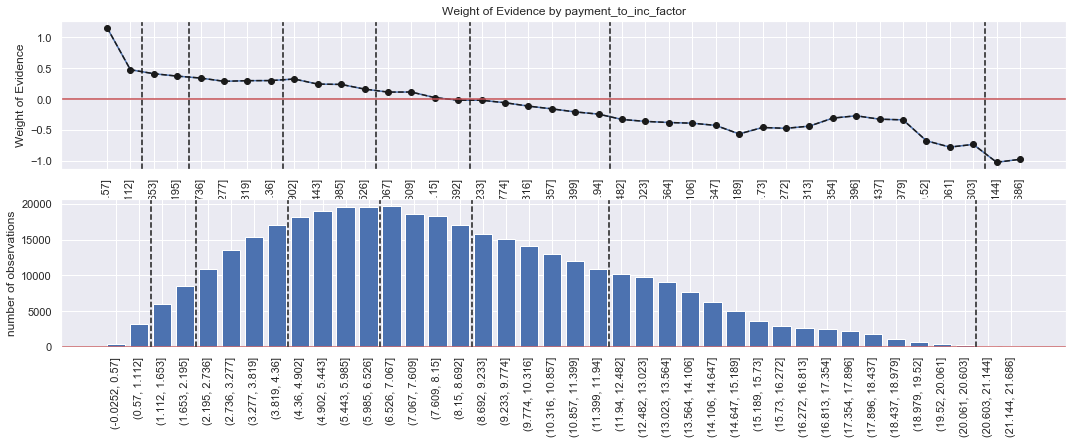

,payment_to_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.0252, 0.57]",457,0.962801,0.001225,440.0,17.0,0.001325,0.000416,1.158594,NaN,NaN,inf
1,"(0.57, 1.112]",3151,0.928911,0.008447,2927.0,224.0,0.008812,0.005480,0.475120,0.033889,0.683474,inf
2,"(1.112, 1.653]",6015,0.924522,0.016125,5561.0,454.0,0.016742,0.011106,0.410469,0.004389,0.064651,inf
3,"(1.653, 2.195]",8473,0.921751,0.022714,7810.0,663.0,0.023514,0.016219,0.371418,0.002771,0.039051,inf
4,"(2.195, 2.736]",10901,0.919457,0.029223,10023.0,878.0,0.030176,0.021478,0.340024,0.002295,0.031394,inf
5,"(2.736, 3.277]",13510,0.915470,0.036217,12368.0,1142.0,0.037236,0.027936,0.287364,0.003987,0.052660,inf
6,"(3.277, 3.819]",15429,0.916262,0.041362,14137.0,1292.0,0.042562,0.031605,0.297637,0.000792,0.010273,inf
7,"(3.819, 4.36]",17040,0.916373,0.045680,15615.0,1425.0,0.047012,0.034859,0.299093,0.000112,0.001456,inf
8,"(4.36, 4.902]",18186,0.918289,0.048752,16700.0,1486.0,0.050279,0.036351,0.324354,0.001916,0.025261,inf
9,"(4.902, 5.443]",19050,0.911916,0.051069,17372.0,1678.0,0.052302,0.041048,0.242290,0.006373,0.082064,inf


In [72]:
df_inputs_prepr['payment_to_inc_factor'] = pd.cut(df_inputs_prepr['payment_to_inc'], 100)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'payment_to_inc_factor', df_targets_prepr)

clockwork.plot_by_woe_marker(df_temp.iloc[: 40, : ], [1.5,3.5,7.5,11.5,15.5,21.5,37.5], 90)
df_temp.head(50)

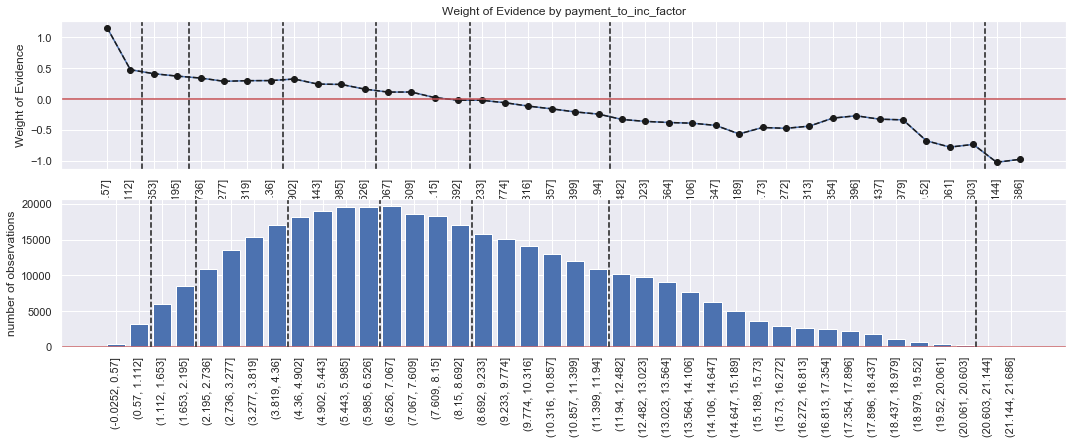

In [73]:
clockwork.plot_by_woe_marker(df_temp.iloc[: 40, : ], [1.5,3.5,7.5,11.5,15.5,21.5,37.5], 90)

In [74]:
# Payment_to_inc_Factor
df_inputs_prepr['payment_to_inc_factor:<1'] = np.where((df_inputs_prepr['payment_to_inc'] < 1), 1, 0)
df_inputs_prepr['payment_to_inc_factor:1-2'] = np.where((df_inputs_prepr['payment_to_inc'] > 1) & (df_inputs_prepr['payment_to_inc'] <= 2), 1, 0)
df_inputs_prepr['payment_to_inc_factor:2-4'] = np.where((df_inputs_prepr['payment_to_inc'] > 2) & (df_inputs_prepr['payment_to_inc'] <= 4), 1, 0)
df_inputs_prepr['payment_to_inc_factor:4-6'] = np.where((df_inputs_prepr['payment_to_inc'] > 4) & (df_inputs_prepr['payment_to_inc'] <= 6), 1, 0)
df_inputs_prepr['payment_to_inc_factor:6-8'] = np.where((df_inputs_prepr['payment_to_inc'] > 6) & (df_inputs_prepr['payment_to_inc'] <= 8), 1, 0)
df_inputs_prepr['payment_to_inc_factor:8-11'] = np.where((df_inputs_prepr['payment_to_inc'] > 8) & (df_inputs_prepr['payment_to_inc'] <= 11), 1, 0)
df_inputs_prepr['payment_to_inc_factor:11-15'] = np.where((df_inputs_prepr['payment_to_inc'] > 11) & (df_inputs_prepr['payment_to_inc'] <= 15), 1, 0)
df_inputs_prepr['payment_to_inc_factor:>15'] = np.where((df_inputs_prepr['payment_to_inc'] > 15), 1, 0)
                                                        
# reference class 'payment_to_inc_factor:>15'

### 3.20 Installment Factor: Installment as a dollar amount

The monthly payment owed by the borrower if the loan originates.
The relationship between installment and default. The relationship is leed strong than payment to inc factor.


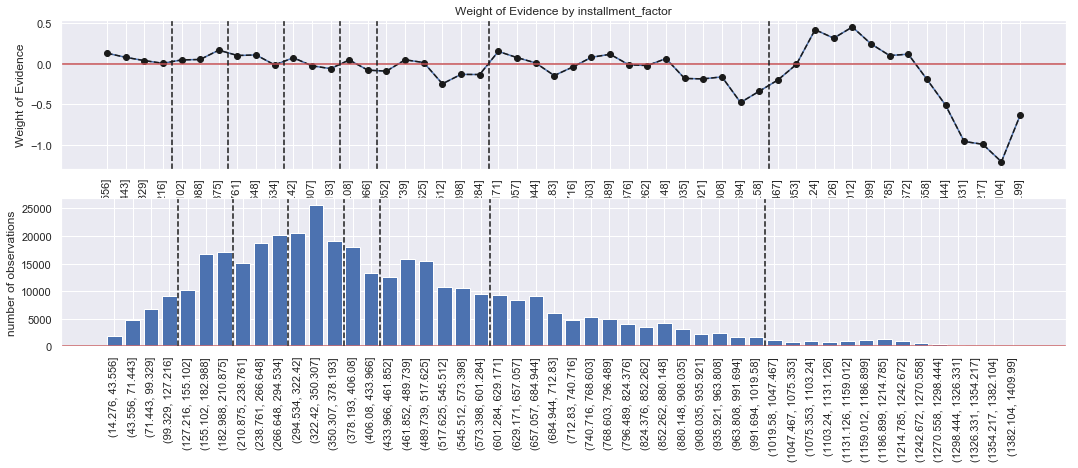

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1843,0.902333,0.004941,1663.0,180.0,0.005007,0.004403,0.128454,NaN,NaN,0.014065
1,"(43.556, 71.443]",4863,0.897800,0.013037,4366.0,497.0,0.013145,0.012158,0.078045,0.004533,0.050409,0.014065
2,"(71.443, 99.329]",6859,0.894008,0.018387,6132.0,727.0,0.018462,0.017784,0.037383,0.003792,0.040663,0.014065
3,"(99.329, 127.216]",9158,0.890806,0.024550,8158.0,1000.0,0.024561,0.024462,0.004032,0.003202,0.033351,0.014065
4,"(127.216, 155.102]",10149,0.894768,0.027207,9081.0,1068.0,0.027340,0.026126,0.045429,0.003962,0.041398,0.014065


In [75]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [3.5,6.5,9.5,12.5,14.5,20.5,35.5], 90)
df_temp.head(5)

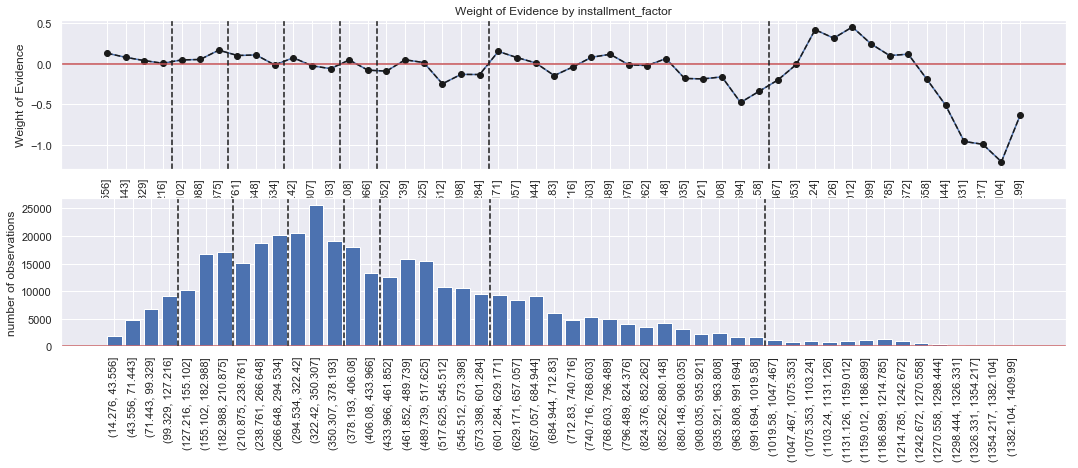

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1843,0.902333,0.004941,1663.0,180.0,0.005007,0.004403,0.128454,NaN,NaN,0.014065
1,"(43.556, 71.443]",4863,0.897800,0.013037,4366.0,497.0,0.013145,0.012158,0.078045,0.004533,0.050409,0.014065
2,"(71.443, 99.329]",6859,0.894008,0.018387,6132.0,727.0,0.018462,0.017784,0.037383,0.003792,0.040663,0.014065
3,"(99.329, 127.216]",9158,0.890806,0.024550,8158.0,1000.0,0.024561,0.024462,0.004032,0.003202,0.033351,0.014065
4,"(127.216, 155.102]",10149,0.894768,0.027207,9081.0,1068.0,0.027340,0.026126,0.045429,0.003962,0.041398,0.014065


In [76]:
# clockwork.plot_by_woe(df_temp, 90)
clockwork.plot_by_woe_marker(df_temp, [3.5,6.5,9.5,12.5,14.5,20.5,35.5], 90)
df_temp.head(5)

In [77]:
# Installment Factor
df_inputs_prepr['installment:<130'] = np.where((df_inputs_prepr['installment'] < 130), 1, 0)
df_inputs_prepr['installment:130-214'] = np.where((df_inputs_prepr['installment'] > 130) & (df_inputs_prepr['installment'] <= 214), 1, 0)
df_inputs_prepr['installment:214-296'] = np.where((df_inputs_prepr['installment'] > 214) & (df_inputs_prepr['installment'] <= 296), 1, 0)
df_inputs_prepr['installment:296-380'] = np.where((df_inputs_prepr['installment'] > 296) & (df_inputs_prepr['installment'] <= 380), 1, 0)
df_inputs_prepr['installment:380-435'] = np.where((df_inputs_prepr['installment'] > 380) & (df_inputs_prepr['installment'] <= 435), 1, 0)
df_inputs_prepr['installment:435-603'] = np.where((df_inputs_prepr['installment'] > 435) & (df_inputs_prepr['installment'] <= 603), 1, 0)
df_inputs_prepr['installment:603-1020'] = np.where((df_inputs_prepr['installment'] > 603) & (df_inputs_prepr['installment'] <= 1020), 1, 0)
df_inputs_prepr['installment:>1020'] = np.where((df_inputs_prepr['installment'] > 1020), 1, 0)
# reference class 'installment_factor:>1020'

### Preprocessing Continuous Variables: Creating Dummy Variables

### 3.20 Annual Income Classification

Let's consider > USD 140,000 as a high income. Filter on incomes < $140k
There is a strong positive relationship between income and WoE of non-default.

Reference class is: 'annual_inc:<20K'

C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


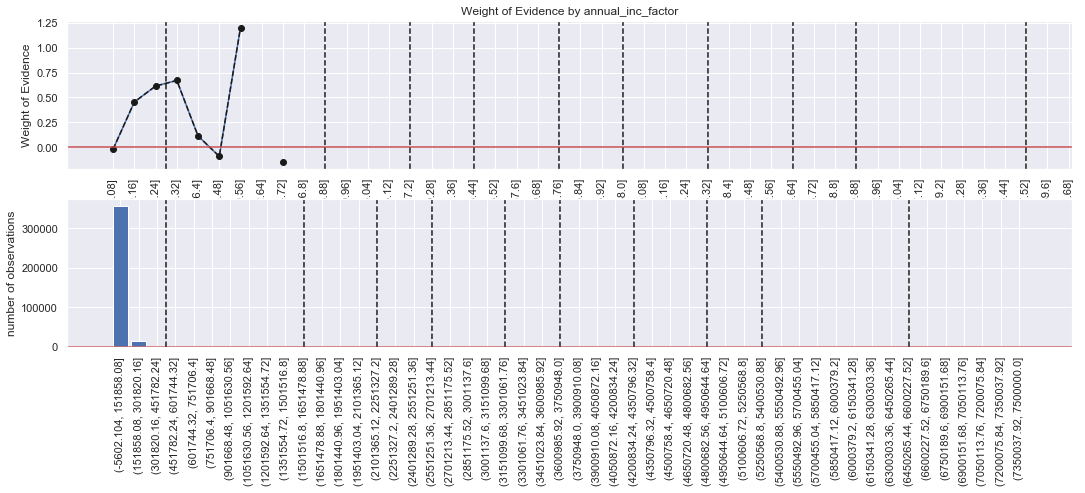

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 151858.08]",356668,0.888672,0.956143,316961.0,39707.0,0.954274,0.971330,-0.017716,NaN,NaN,inf
1,"(151858.08, 301820.16]",14742,0.927554,0.039520,13674.0,1068.0,0.041168,0.026126,0.454741,0.038882,0.472457,inf
2,"(301820.16, 451782.24]",1089,0.937557,0.002919,1021.0,68.0,0.003074,0.001663,0.614063,0.010003,0.159322,inf
3,"(451782.24, 601744.32]",304,0.940789,0.000815,286.0,18.0,0.000861,0.000440,0.670653,0.003232,0.056590,inf
4,"(601744.32, 751706.4]",91,0.901099,0.000244,82.0,9.0,0.000247,0.000220,0.114527,0.039691,0.556125,inf
5,"(751706.4, 901668.48]",59,0.881356,0.000158,52.0,7.0,0.000157,0.000171,-0.089634,0.019743,0.204161,inf
6,"(901668.48, 1051630.56]",28,0.964286,0.000075,27.0,1.0,0.000081,0.000024,1.200870,0.082930,1.290503,inf
7,"(1051630.56, 1201592.64]",21,1.000000,0.000056,21.0,0.0,0.000063,0.000000,inf,0.035714,inf,inf
8,"(1201592.64, 1351554.72]",8,0.875000,0.000021,7.0,1.0,0.000021,0.000024,-0.149057,0.125000,inf,inf
9,"(1351554.72, 1501516.8]",3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,inf,0.125000,inf,inf


In [78]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp,[2.5, 10,14,17,21,24,28,32,35,43],90)
df_temp

C:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


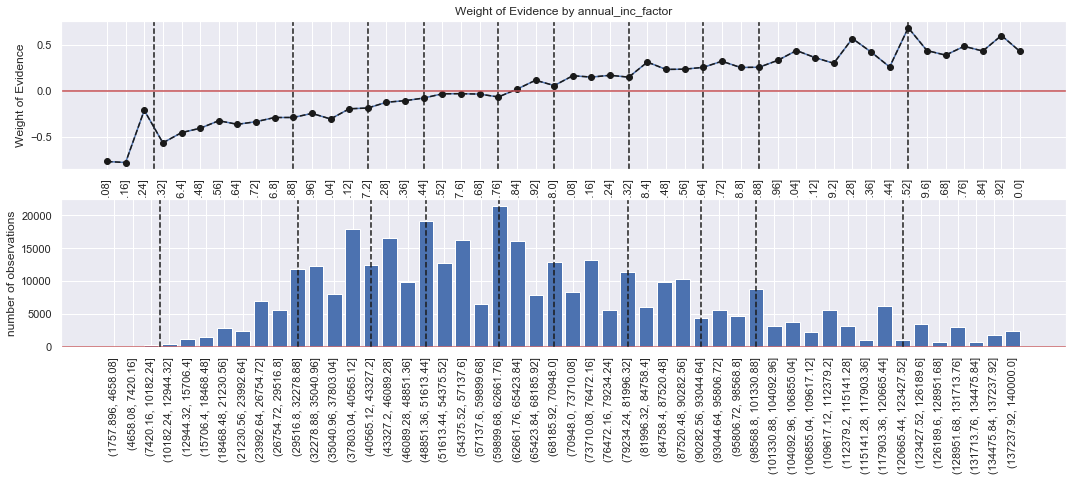

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",14,0.785714,0.000040,11.0,3.0,0.000035,0.000076,-0.772668,NaN,NaN,0.050253
1,"(4658.08, 7420.16]",37,0.783784,0.000105,29.0,8.0,0.000093,0.000204,-0.784097,0.001931,0.011429,0.050253
2,"(7420.16, 10182.24]",289,0.865052,0.000823,250.0,39.0,0.000802,0.000993,-0.214052,0.081268,0.570045,0.050253
3,"(10182.24, 12944.32]",544,0.818015,0.001550,445.0,99.0,0.001427,0.002521,-0.568997,0.047037,0.354945,0.050253
4,"(12944.32, 15706.4]",1223,0.834015,0.003484,1020.0,203.0,0.003272,0.005170,-0.457599,0.016000,0.111397,0.050253
5,"(15706.4, 18468.48]",1530,0.840523,0.004359,1286.0,244.0,0.004125,0.006214,-0.409828,0.006508,0.047772,0.050253
6,"(18468.48, 21230.56]",2917,0.851217,0.008310,2483.0,434.0,0.007964,0.011053,-0.327773,0.010694,0.082055,0.050253
7,"(21230.56, 23992.64]",2503,0.846185,0.007130,2118.0,385.0,0.006794,0.009805,-0.366967,0.005032,0.039194,0.050253
8,"(23992.64, 26754.72]",7042,0.849901,0.020061,5985.0,1057.0,0.019197,0.026920,-0.338130,0.003716,0.028837,0.050253
9,"(26754.72, 29516.8]",5624,0.855619,0.016021,4812.0,812.0,0.015435,0.020681,-0.292584,0.005718,0.045546,0.050253


In [79]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp.iloc[:50,:], [2.5, 10,14,17,21,24,28,32,35,43],90)
df_temp

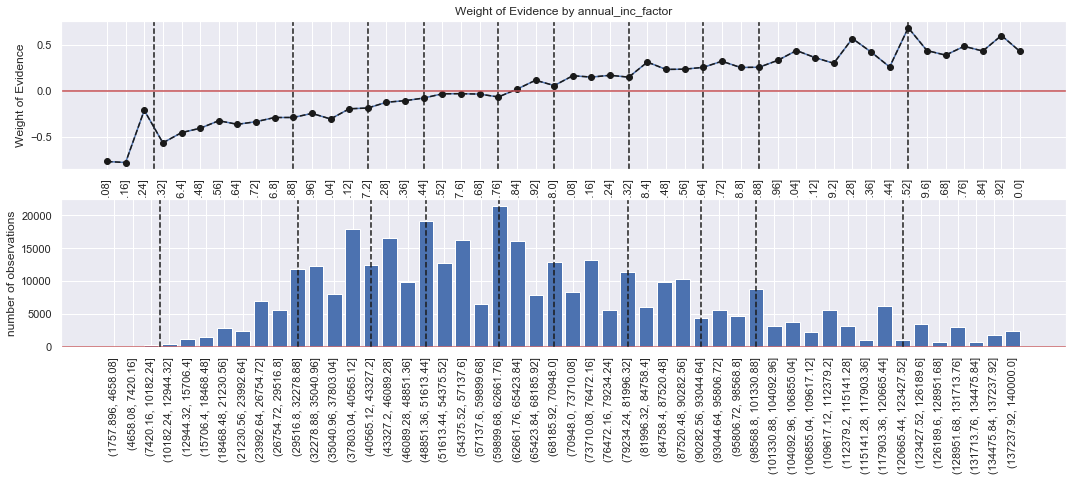

In [80]:
clockwork.plot_by_woe_marker(df_temp.iloc[:50,:], [2.5, 10,14,17,21,24,28,32,35,43],90)

#### Good Outcomes appear monotonically increasing in Income
It makes sense to split income into logical brackets.

In [81]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

### 3.21 Months Since Last Delinquency

The number of months since the borrower's last delinquency. Most borrowers have not been delinquent so most observations = never. 

Reference class is: 0

In [82]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User1\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User1\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5262,0.873432,0.030458,4596.0,666.0,0.029820,0.035728,-0.180742,NaN,NaN,inf
1,"(3.76, 7.52]",11063,0.887643,0.064035,9820.0,1243.0,0.063715,0.066681,-0.045501,0.014211,0.135241,inf
2,"(7.52, 11.28]",13369,0.890194,0.077383,11901.0,1468.0,0.077217,0.078751,-0.019673,0.002550,0.025828,inf
3,"(11.28, 15.04]",13244,0.889157,0.076659,11776.0,1468.0,0.076406,0.078751,-0.030231,0.001036,0.010559,inf
4,"(15.04, 18.8]",9290,0.894941,0.053772,8314.0,976.0,0.053944,0.052358,0.029840,0.005783,0.060071,inf
5,"(18.8, 22.56]",11568,0.895228,0.066958,10356.0,1212.0,0.067193,0.065018,0.032900,0.000287,0.003061,inf
6,"(22.56, 26.32]",10916,0.896574,0.063184,9787.0,1129.0,0.063501,0.060565,0.047329,0.001346,0.014429,inf
7,"(26.32, 30.08]",10560,0.895360,0.061123,9455.0,1105.0,0.061347,0.059278,0.034304,0.001214,0.013024,inf
8,"(30.08, 33.84]",7586,0.898234,0.043909,6814.0,772.0,0.044211,0.041414,0.065356,0.002874,0.031052,inf
9,"(33.84, 37.6]",9717,0.899043,0.056244,8736.0,981.0,0.056682,0.052626,0.074241,0.000809,0.008885,inf


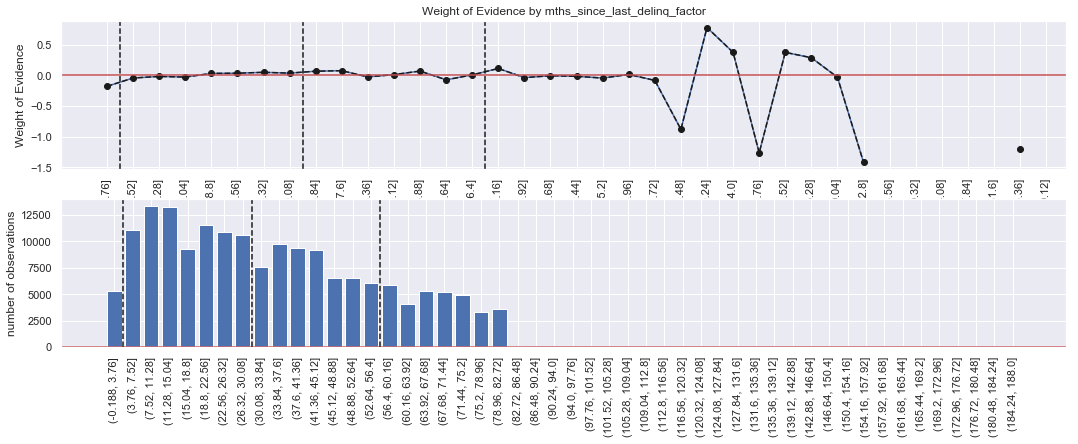

In [83]:
clockwork.plot_by_woe_marker(df_temp, [0.5,7.5, 14.5], 90)

In [84]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### 3.22 DTI: Debt to Income Ratio

DTI = Debt to income ratio. A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-report.

We expect that as DTI increases default becomes more likely.

This does not inclede the 'affordability' factor of the new loan

Reference Class is: Highest dti

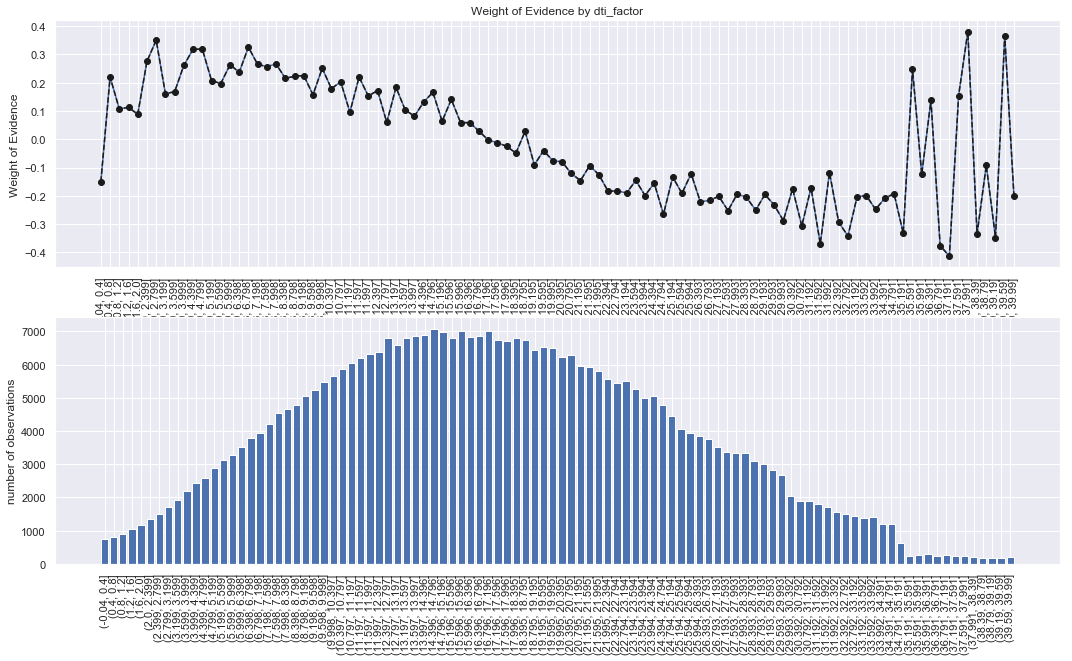

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",751,0.874834,0.002013,657.0,94.0,0.001978,0.002299,-0.150578,NaN,NaN,0.030797
1,"(0.4, 0.8]",812,0.910099,0.002177,739.0,73.0,0.002225,0.001786,0.219871,0.035265,0.370449,0.030797
2,"(0.8, 1.2]",904,0.900442,0.002423,814.0,90.0,0.002451,0.002202,0.107184,0.009656,0.112688,0.030797
3,"(1.2, 1.6]",1050,0.900952,0.002815,946.0,104.0,0.002848,0.002544,0.112884,0.000510,0.005701,0.030797
4,"(1.6, 2.0]",1185,0.898734,0.003177,1065.0,120.0,0.003206,0.002935,0.088271,0.002218,0.024613,0.030797
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",218,0.853211,0.000584,186.0,32.0,0.000560,0.000783,-0.334956,0.069203,0.715593,0.030797
96,"(38.39, 38.79]",185,0.881081,0.000496,163.0,22.0,0.000491,0.000538,-0.092259,0.027870,0.242697,0.030797
97,"(38.79, 39.19]",182,0.851648,0.000488,155.0,27.0,0.000467,0.000660,-0.347379,0.029433,0.255119,0.030797
98,"(39.19, 39.59]",178,0.921348,0.000477,164.0,14.0,0.000494,0.000342,0.365842,0.069700,0.713221,0.030797


In [85]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
clockwork.plot_by_woe(df_temp, 90)
df_temp

In [86]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, :]

In [87]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1373,0.889294,0.003709,1221.0,152.0,0.003704,0.003749,-0.012067,NaN,NaN,0.029288
1,"(0.7, 1.4]",1645,0.897872,0.004444,1477.0,168.0,0.004481,0.004144,0.078193,0.008579,0.090259,0.029288
2,"(1.4, 2.1]",2010,0.907960,0.005430,1825.0,185.0,0.005537,0.004563,0.193368,0.010088,0.115175,0.029288
3,"(2.1, 2.8]",2580,0.915504,0.006970,2362.0,218.0,0.007166,0.005377,0.287157,0.007544,0.093789,0.029288
4,"(2.8, 3.5]",3174,0.907057,0.008575,2879.0,295.0,0.008734,0.007277,0.182611,0.008447,0.104546,0.029288
5,"(3.5, 4.2]",3811,0.913409,0.010296,3481.0,330.0,0.010561,0.008140,0.260371,0.006351,0.077759,0.029288
6,"(4.2, 4.9]",4599,0.916504,0.012424,4215.0,384.0,0.012788,0.009472,0.300151,0.003095,0.039780,0.029288
7,"(4.9, 5.6]",5344,0.908121,0.014437,4853.0,491.0,0.014723,0.012111,0.195297,0.008382,0.104854,0.029288
8,"(5.6, 6.3]",5944,0.912180,0.016058,5422.0,522.0,0.016449,0.012876,0.244941,0.004059,0.049644,0.029288
9,"(6.3, 7.0]",6570,0.915982,0.017749,6018.0,552.0,0.018258,0.013616,0.293351,0.003801,0.048410,0.029288


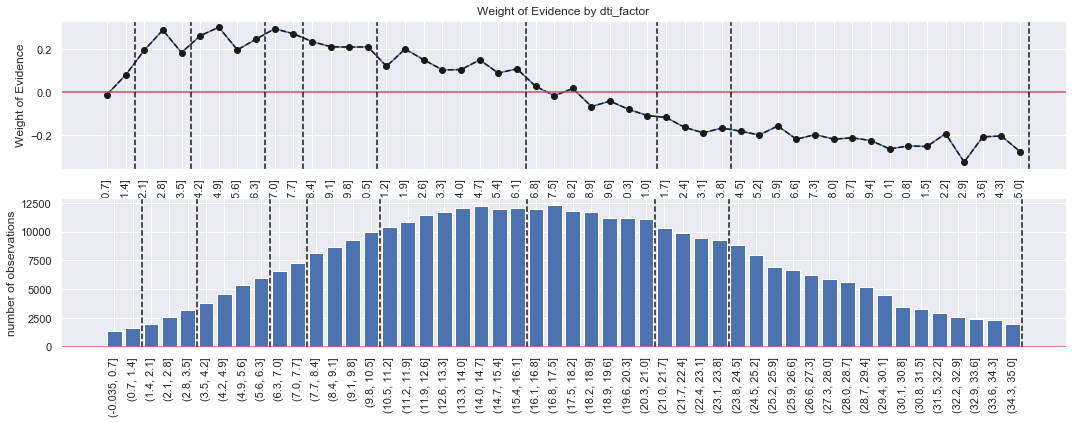

In [88]:
clockwork.plot_by_woe_marker(df_temp, [1.5,4.5,8.5,10.5,14.5,22.5,29.5,33.5,49.5], 90)

In [89]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-21.0'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 21.0), 1, 0)
df_inputs_prepr['dti:21.0-23.8'] = np.where((df_inputs_prepr['dti'] > 21.0) & (df_inputs_prepr['dti'] <= 23.8), 1, 0)
df_inputs_prepr['dti:23.8-35.0'] = np.where((df_inputs_prepr['dti'] > 23.8) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)
# reference class = 'dti:>35'

### 3.23 mths_since_last_record

The number of months since the last public record.

The reference class:

C:\Users\User1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


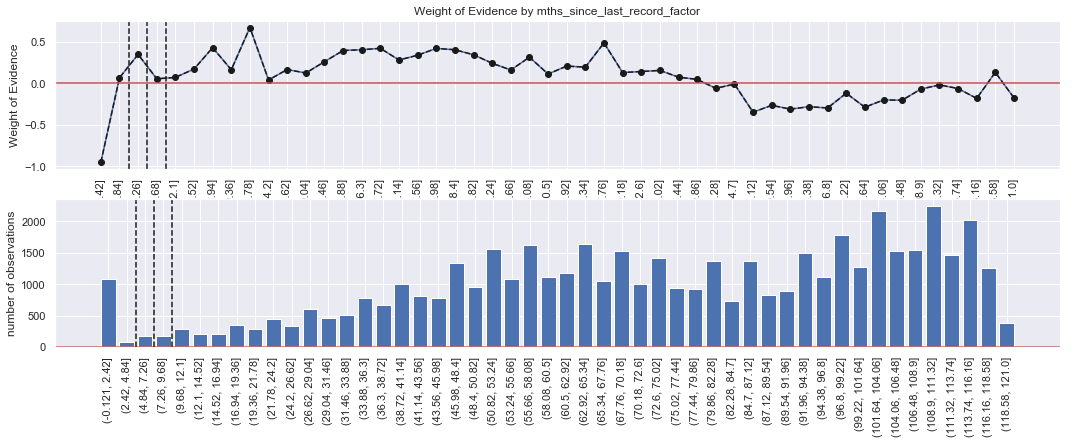

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1078,0.764378,0.021564,824.0,254.0,0.018443,0.047816,-0.952677,NaN,NaN,0.082607
1,"(2.42, 4.84]",80,0.900000,0.001600,72.0,8.0,0.001612,0.001506,0.067712,0.135622,1.020388,0.082607
2,"(4.84, 7.26]",168,0.922619,0.003361,155.0,13.0,0.003469,0.002447,0.348963,0.022619,0.281251,0.082607
3,"(7.26, 9.68]",168,0.898810,0.003361,151.0,17.0,0.003380,0.003200,0.054554,0.023810,0.294409,0.082607
4,"(9.68, 12.1]",291,0.900344,0.005821,262.0,29.0,0.005864,0.005459,0.071536,0.001534,0.016982,0.082607


In [90]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
clockwork.plot_by_woe_marker(df_temp, [1.5,2.5,3.5], 90)
df_temp.head()

In [91]:
df_temp.head()

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1078,0.764378,0.021564,824.0,254.0,0.018443,0.047816,-0.952677,NaN,NaN,0.082607
1,"(2.42, 4.84]",80,0.900000,0.001600,72.0,8.0,0.001612,0.001506,0.067712,0.135622,1.020388,0.082607
2,"(4.84, 7.26]",168,0.922619,0.003361,155.0,13.0,0.003469,0.002447,0.348963,0.022619,0.281251,0.082607
3,"(7.26, 9.68]",168,0.898810,0.003361,151.0,17.0,0.003380,0.003200,0.054554,0.023810,0.294409,0.082607
4,"(9.68, 12.1]",291,0.900344,0.005821,262.0,29.0,0.005864,0.005459,0.071536,0.001534,0.016982,0.082607


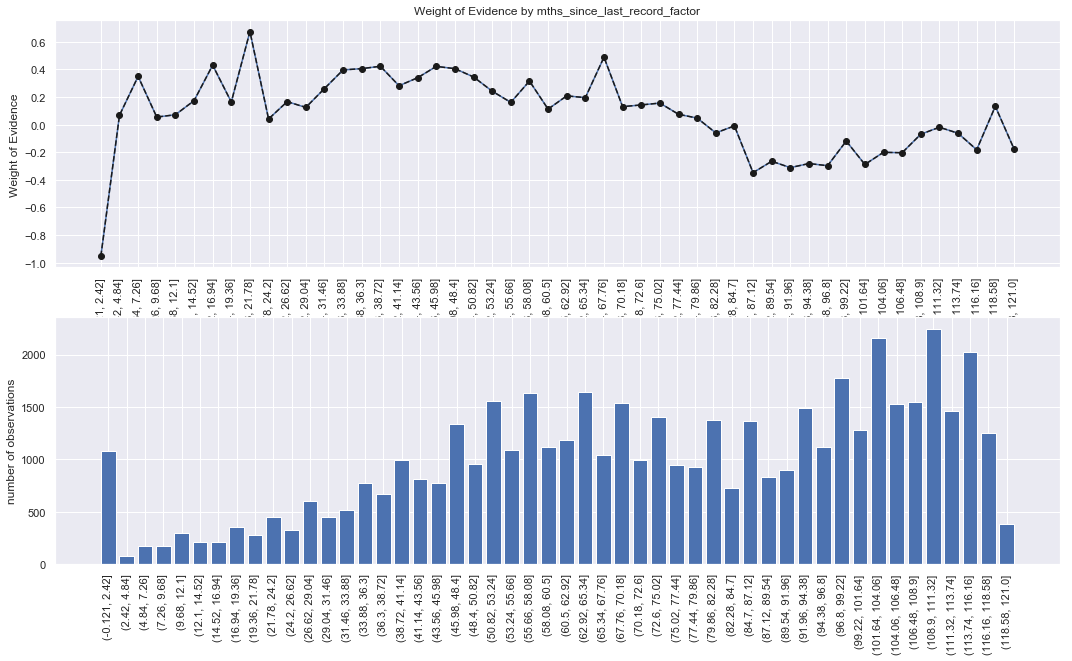

In [92]:
clockwork.plot_by_woe(df_temp, 90)

In [93]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### 4 Macro Economic Variables

TED Spread is a perceived indicator of credit risk in the economy at large:
  
   Ted Spread = 3M Libor - T-Bill Rate
   
As credit risk in the economy increases 3M Libor (the interbank lending rate) increses more quickly than the T-Bill (treasury rate. We would expect defaults to increase as the TED spread widens.

### Ted Spreads

In [94]:
df_temp = []
df_inputs_prepr['ted_spread_min_factor'] = pd.cut(df_inputs_prepr['ted_spread_min'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'ted_spread_min_factor', df_targets_prepr)
df_temp.head(10)

,ted_spread_min_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.0876, 0.138]",16123,0.874651,0.043222,14102.0,2021.0,0.042457,0.049439,-0.152243,NaN,NaN,0.040439
1,"(0.138, 0.187]",89465,0.886123,0.239835,79277.0,10188.0,0.238679,0.249223,-0.043230,0.011472,0.109013,0.040439
2,"(0.187, 0.235]",226594,0.902738,0.607445,204555.0,22039.0,0.615853,0.539128,0.133056,0.016615,0.176286,0.040439
3,"(0.235, 0.284]",4846,0.848329,0.012991,4111.0,735.0,0.012377,0.017980,-0.373416,0.054409,0.506472,0.040439
4,"(0.284, 0.332]",10953,0.839953,0.029362,9200.0,1753.0,0.027698,0.042883,-0.437092,0.008376,0.063676,0.040439
5,"(0.332, 0.38]",15377,0.839175,0.041222,12904.0,2473.0,0.038850,0.060496,-0.442862,0.000777,0.005770,0.040439
6,"(0.38, 0.429]",2108,0.858634,0.005651,1810.0,298.0,0.005449,0.007290,-0.290979,0.019458,0.151883,0.040439
7,"(0.429, 0.477]",281,0.850534,0.000753,239.0,42.0,0.000720,0.001027,-0.356173,0.008100,0.065195,0.040439
8,"(0.477, 0.526]",3910,0.830435,0.010482,3247.0,663.0,0.009776,0.016219,-0.506255,0.020099,0.150082,0.040439
9,"(0.526, 0.574]",61,0.704918,0.000164,43.0,18.0,0.000129,0.000440,-1.224139,0.125517,0.717883,0.040439


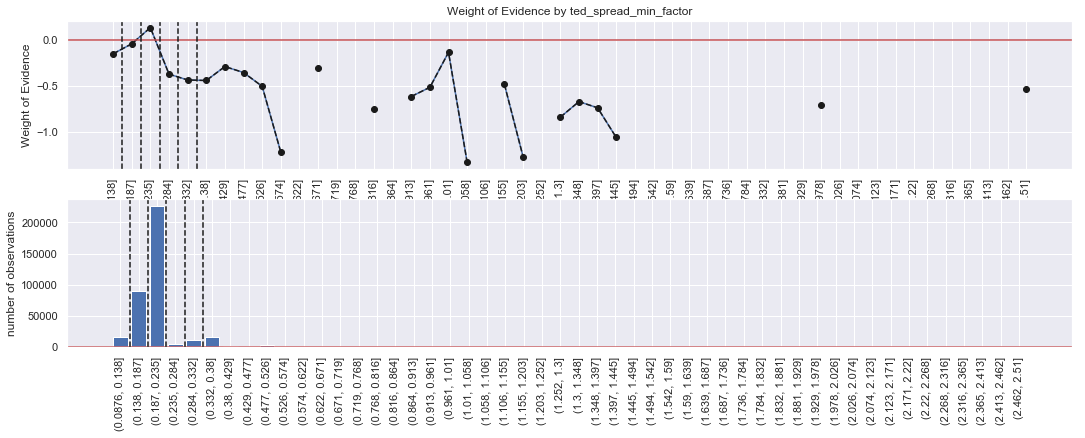

In [95]:
clockwork.plot_by_woe_marker(df_temp, [0.5,1.5,2.5,3.5,4.5], 90)

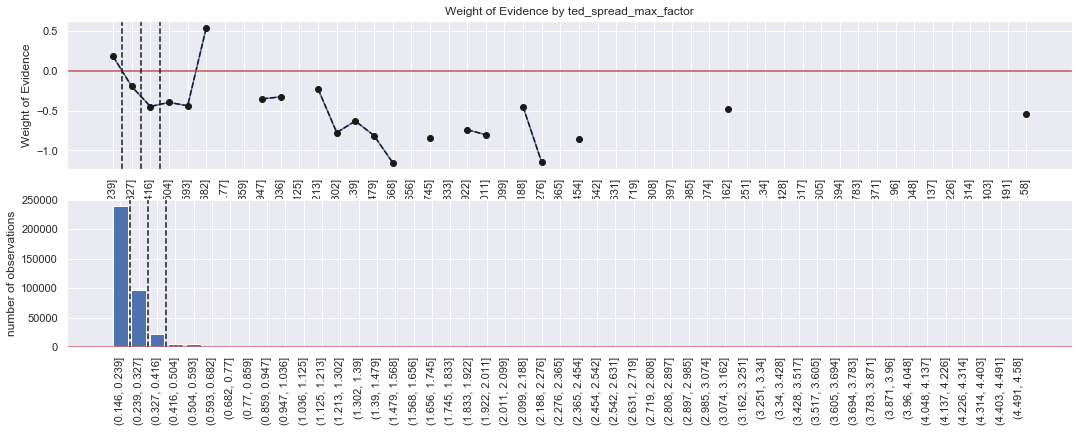

,ted_spread_max_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.146, 0.239]",239340,0.907049,0.641614,217093.0,22247.0,0.653601,0.544216,0.183151,NaN,NaN,0.058013
1,"(0.239, 0.327]",96910,0.869797,0.259793,84292.0,12618.0,0.253778,0.308667,-0.195805,0.037252,0.378956,0.058013
2,"(0.327, 0.416]",22114,0.838473,0.059282,18542.0,3572.0,0.055824,0.087380,-0.448054,0.031323,0.252250,0.058013
3,"(0.416, 0.504]",4994,0.845414,0.013388,4222.0,772.0,0.012711,0.018885,-0.395888,0.006941,0.052167,0.058013
4,"(0.504, 0.593]",5973,0.839612,0.016012,5015.0,958.0,0.015099,0.023435,-0.439626,0.005803,0.043739,0.058013
5,"(0.593, 0.682]",45,0.933333,0.000121,42.0,3.0,0.000126,0.000073,0.544090,0.093722,0.983716,0.058013
6,"(0.682, 0.77]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058013
7,"(0.77, 0.859]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058013
8,"(0.859, 0.947]",302,0.850993,0.000810,257.0,45.0,0.000774,0.001101,-0.352554,NaN,NaN,0.058013
9,"(0.947, 1.036]",508,0.854331,0.001362,434.0,74.0,0.001307,0.001810,-0.325988,0.003337,0.026566,0.058013


In [96]:
df_temp = []
df_inputs_prepr['ted_spread_max_factor'] = pd.cut(df_inputs_prepr['ted_spread_max'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'ted_spread_max_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [0.5,1.5,2.5], 90)
df_temp.head(10)

In [97]:
df_inputs_prepr['ted_spread_max:<0.239'] = np.where((df_inputs_prepr['ted_spread_max'] <= 0.239), 1, 0)
df_inputs_prepr['ted_spread_max:0.239-0.327'] = np.where((df_inputs_prepr['ted_spread_max'] > 0.239) & (df_inputs_prepr['ted_spread_max'] <= 0.327), 1, 0)
df_inputs_prepr['ted_spread_max:0.327-0.416'] = np.where((df_inputs_prepr['ted_spread_max'] > 0.327) & (df_inputs_prepr['ted_spread_max'] <= 0.416), 1, 0)
df_inputs_prepr['ted_spread_max:>0.416'] = np.where((df_inputs_prepr['ted_spread_max'] > 0.416), 1, 0)

### Unemployment

We would expect to see a positive relationship between unemployment and default. As unemployment increases we would expect more borrowers to find themselves in distress and go onto default.
As unemployment increases we expect to see WoE decrease.

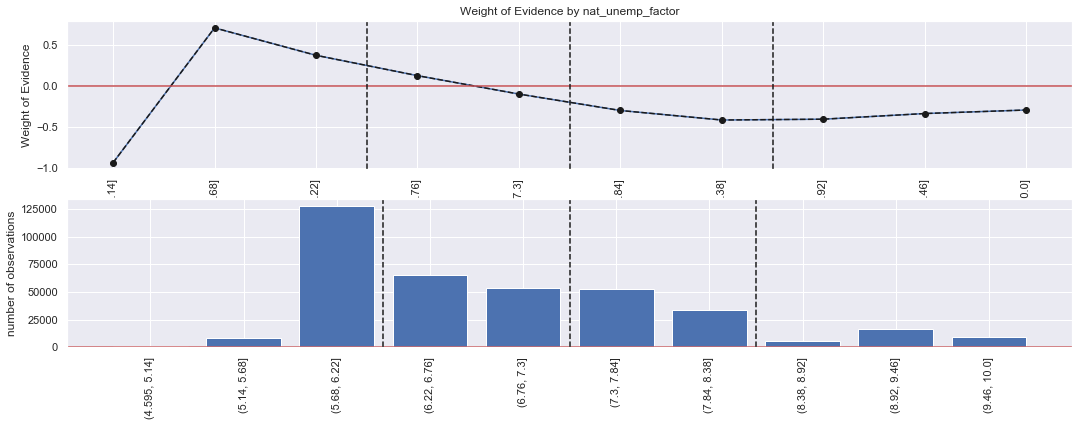

,nat_unemp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4.595, 5.14]",1513,0.762062,0.004056,1153.0,360.0,0.003471,0.008806,-0.930949,NaN,NaN,0.101072
1,"(5.14, 5.68]",8435,0.942620,0.022612,7951.0,484.0,0.023938,0.011840,0.704001,0.180558,1.634950,0.101072
2,"(5.68, 6.22]",127449,0.921741,0.341661,117475.0,9974.0,0.353682,0.243988,0.371277,0.020879,0.332724,0.101072
3,"(6.22, 6.76]",65087,0.901977,0.174483,58707.0,6380.0,0.176749,0.156070,0.124424,0.019764,0.246853,0.101072
4,"(6.76, 7.3]",53547,0.880385,0.143547,47142.0,6405.0,0.141930,0.156682,-0.098882,0.021592,0.223305,0.101072


In [98]:
df_temp = []
df_inputs_prepr['nat_unemp_factor'] = pd.cut(df_inputs_prepr['nat_unemp'], 10)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'nat_unemp_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [2.5,4.5,6.5],90)
df_temp.head(5)

In [99]:
df_inputs_prepr['nat_unemp:<5.68'] = np.where((df_inputs_prepr['nat_unemp'] <= 5.68), 1, 0)
df_inputs_prepr['nat_unemp:5.68-6.22'] = np.where((df_inputs_prepr['nat_unemp'] > 5.68) & (df_inputs_prepr['nat_unemp'] <= 6.22), 1, 0)
df_inputs_prepr['nat_unemp:6.22-7.3'] = np.where((df_inputs_prepr['nat_unemp'] > 6.22) & (df_inputs_prepr['nat_unemp'] <= 7.3), 1, 0)
df_inputs_prepr['nat_unemp:7.3-8.38'] = np.where((df_inputs_prepr['nat_unemp'] > 7.3) & (df_inputs_prepr['nat_unemp'] <= 8.38), 1, 0)
df_inputs_prepr['nat_unemp:>8.38'] = np.where((df_inputs_prepr['nat_unemp'] > 8.38), 1, 0)

### Vix
Vix is a traded volatility index that is used commonly used a proxy for market volatility.
We expect to see more uncertainty in times of high volatility, and expect uncertainty to be postively correlated with default.

As the Vix increases we expect to see WoE decrease.  As Vix is quoted daily run try monthly vix maximum and monthly vix minimum. Vix_min has a better / smoother relationship with default, so we will include vix_min as a feature. (we can only choose one of the two)

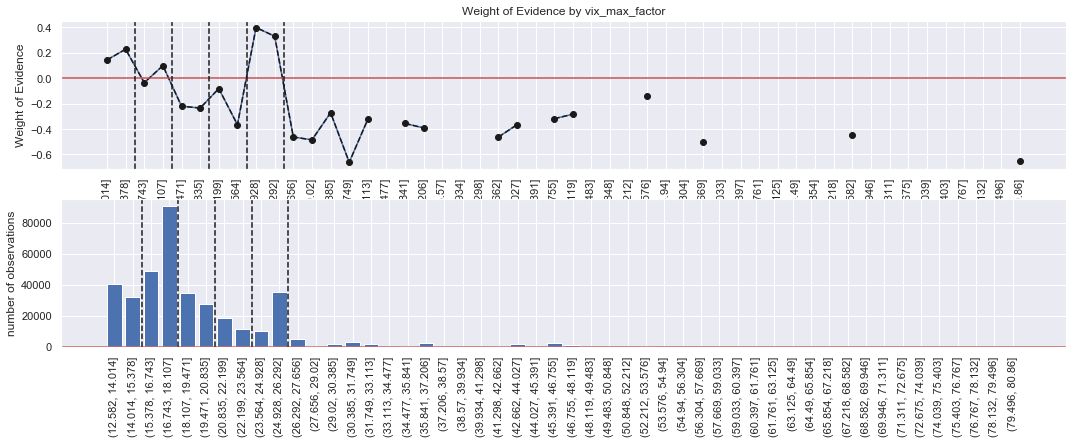

,vix_max_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(12.582, 14.014]",40797,0.903694,0.109367,36868.0,3929.0,0.110998,0.096113,0.143992,NaN,NaN,0.049609
1,"(14.014, 15.378]",32035,0.910785,0.085878,29177.0,2858.0,0.087843,0.069914,0.228291,0.007091,0.084300,0.049609
2,"(15.378, 16.743]",48700,0.886940,0.130553,43194.0,5506.0,0.130044,0.134690,-0.035104,0.023845,0.263395,0.049609
3,"(16.743, 18.107]",90853,0.899706,0.243555,81741.0,9112.0,0.246097,0.222902,0.098996,0.012766,0.134100,0.049609
4,"(18.107, 19.471]",34977,0.867027,0.093765,30326.0,4651.0,0.091302,0.113775,-0.220044,0.032679,0.319040,0.049609
5,"(19.471, 20.835]",27430,0.865293,0.073533,23735.0,3695.0,0.071459,0.090389,-0.234997,0.001733,0.014953,0.049609
6,"(20.835, 22.199]",18681,0.882180,0.050079,16480.0,2201.0,0.049616,0.053842,-0.081731,0.016886,0.153266,0.049609
7,"(22.199, 23.564]",11274,0.849299,0.030223,9575.0,1699.0,0.028827,0.041562,-0.365851,0.032880,0.284120,0.049609
8,"(23.564, 24.928]",10228,0.923739,0.027419,9448.0,780.0,0.028445,0.019081,0.399297,0.074439,0.765149,0.049609
9,"(24.928, 26.292]",35372,0.918721,0.094824,32497.0,2875.0,0.097839,0.070330,0.330128,0.005018,0.069169,0.049609


In [100]:
df_temp = []
df_inputs_prepr['vix_max_factor'] = pd.cut(df_inputs_prepr['vix_max'], 50)
df_temp= clockwork.woe_ordered_continuous(df_inputs_prepr, 'vix_max_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [1.5,3.5, 5.5, 7.5,9.5],90)
df_temp.head(10)

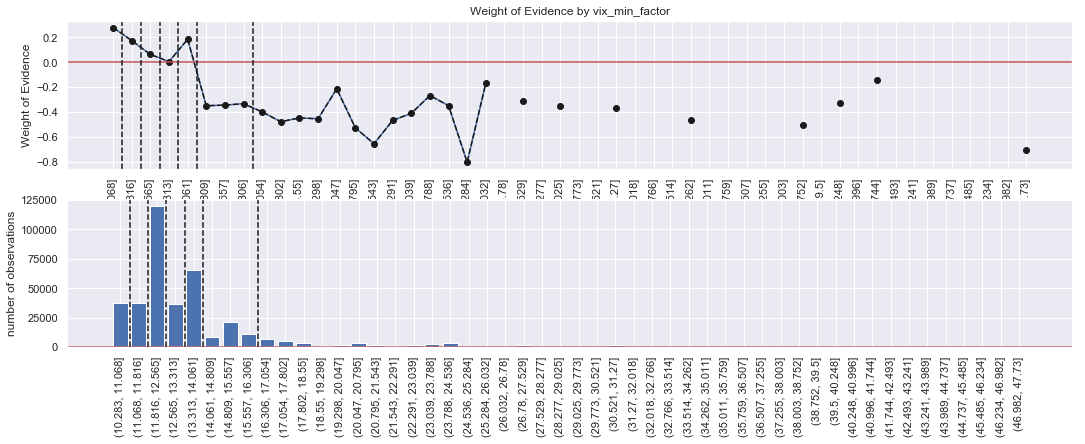

,vix_min_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(10.283, 11.068]",37301,0.914640,0.099995,34117.0,3184.0,0.102716,0.077888,0.276690,NaN,NaN,0.052008
1,"(11.068, 11.816]",37005,0.906067,0.099202,33529.0,3476.0,0.100946,0.085031,0.171561,0.008574,0.105129,0.052008
2,"(11.816, 12.565]",120002,0.896193,0.321697,107545.0,12457.0,0.323785,0.304729,0.060659,0.009873,0.110902,0.052008
3,"(12.565, 13.313]",36862,0.890755,0.098818,32835.0,4027.0,0.098856,0.098510,0.003506,0.005439,0.057153,0.052008
4,"(13.313, 14.061]",65548,0.906984,0.175719,59451.0,6097.0,0.178989,0.149147,0.182388,0.016229,0.178882,0.052008
5,"(14.061, 14.809]",8606,0.851267,0.023071,7326.0,1280.0,0.022056,0.031312,-0.350398,0.055718,0.532786,0.052008
6,"(14.809, 15.557]",21109,0.851912,0.056588,17983.0,3126.0,0.054141,0.076470,-0.345295,0.000645,0.005103,0.052008
7,"(15.557, 16.306]",10915,0.853321,0.029261,9314.0,1601.0,0.028042,0.039164,-0.334077,0.001410,0.011218,0.052008
8,"(16.306, 17.054]",6949,0.844870,0.018629,5871.0,1078.0,0.017676,0.026371,-0.400050,0.008451,0.065973,0.052008
9,"(17.054, 17.802]",4713,0.834288,0.012634,3932.0,781.0,0.011838,0.019105,-0.478639,0.010582,0.078589,0.052008


In [101]:
df_temp = []
df_inputs_prepr['vix_min_factor'] = pd.cut(df_inputs_prepr['vix_min'], 50)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'vix_min_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [0.5,1.5,2.5,3.5,4.5, 7.5],90)
df_temp.head(10)

In [102]:
df_inputs_prepr['vix_min:<11.07'] = np.where((df_inputs_prepr['vix_min'] <= 11.07), 1, 0)
df_inputs_prepr['vix_min:11.07-11.82'] = np.where((df_inputs_prepr['vix_min'] > 11.07) & (df_inputs_prepr['vix_min'] <= 11.82), 1, 0)
df_inputs_prepr['vix_min:11.82-12.56'] = np.where((df_inputs_prepr['vix_min'] > 11.82) & (df_inputs_prepr['vix_min'] <= 12.56), 1, 0)
df_inputs_prepr['vix_min:12.56-13.31'] = np.where((df_inputs_prepr['vix_min'] > 12.56) & (df_inputs_prepr['vix_min'] <= 13.31), 1, 0)
df_inputs_prepr['vix_min:13.31-14.07'] = np.where((df_inputs_prepr['vix_min'] > 13.31) & (df_inputs_prepr['vix_min'] <= 14.07), 1, 0)
df_inputs_prepr['vix_min:14.07-14.81'] = np.where((df_inputs_prepr['vix_min'] > 14.07) & (df_inputs_prepr['vix_min'] <= 14.81), 1, 0)
df_inputs_prepr['vix_min:14.81-16.30'] = np.where((df_inputs_prepr['vix_min'] > 14.81) & (df_inputs_prepr['vix_min'] <= 16.30), 1, 0)
df_inputs_prepr['vix_min:>16.30'] = np.where((df_inputs_prepr['vix_min'] > 16.30), 1, 0)

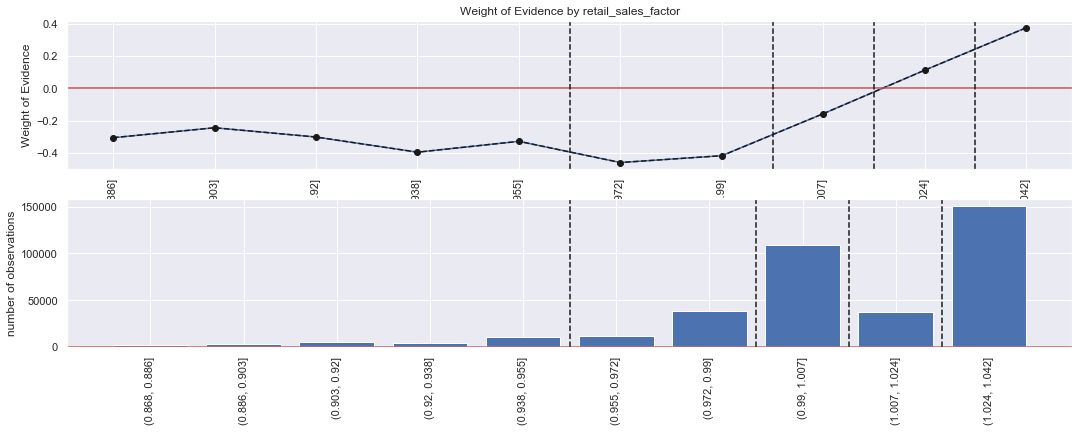

,retail_sales_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.868, 0.886]",2455,0.857026,0.006581,2104.0,351.0,0.006335,0.008586,-0.304158,NaN,NaN,0.094777
1,"(0.886, 0.903]",3178,0.864380,0.008519,2747.0,431.0,0.008270,0.010543,-0.242811,0.007354,0.061347,0.094777
2,"(0.903, 0.92]",5068,0.857537,0.013586,4346.0,722.0,0.013084,0.017662,-0.299981,0.006843,0.057171,0.094777
3,"(0.92, 0.938]",4090,0.845721,0.010964,3459.0,631.0,0.010414,0.015436,-0.393538,0.011816,0.093557,0.094777
4,"(0.938, 0.955]",10546,0.854258,0.028271,9009.0,1537.0,0.027123,0.037599,-0.326576,0.008536,0.066963,0.094777
5,"(0.955, 0.972]",12304,0.837207,0.032984,10301.0,2003.0,0.031013,0.048998,-0.457372,0.017050,0.130797,0.094777
6,"(0.972, 0.99]",38601,0.842880,0.103480,32536.0,6065.0,0.097956,0.148365,-0.415155,0.005672,0.042218,0.094777
7,"(0.99, 1.007]",108821,0.874243,0.291723,95136.0,13685.0,0.286426,0.334768,-0.155960,0.031363,0.259194,0.094777
8,"(1.007, 1.024]",37272,0.900918,0.099917,33579.0,3693.0,0.101096,0.090340,0.112495,0.026675,0.268455,0.094777
9,"(1.024, 1.042]",150693,0.921954,0.403972,138932.0,11761.0,0.418282,0.287703,0.374228,0.021036,0.261734,0.094777


In [103]:
df_temp = []
df_inputs_prepr['retail_sales_factor'] = pd.cut(df_inputs_prepr['retail_sales'], 10)
df_temp = clockwork.woe_ordered_continuous(df_inputs_prepr, 'retail_sales_factor', df_targets_prepr)
clockwork.plot_by_woe_marker(df_temp, [4.5,6.5,7.5, 8.5],90)
df_temp.head(10)

In [104]:
df_inputs_prepr['retail_sales:<0.955'] = np.where((df_inputs_prepr['retail_sales'] <= 0.955), 1, 0)
df_inputs_prepr['retail_sales:0.955-0.99'] = np.where((df_inputs_prepr['retail_sales'] > 0.955) & (df_inputs_prepr['retail_sales'] <= 0.99), 1, 0)
df_inputs_prepr['retail_sales:0.99-1.007'] = np.where((df_inputs_prepr['retail_sales'] > 0.99) & (df_inputs_prepr['retail_sales'] <= 1.007), 1, 0)
df_inputs_prepr['retail_sales:1.007-1.024'] = np.where((df_inputs_prepr['retail_sales'] > 1.007) & (df_inputs_prepr['retail_sales'] <= 1.024), 1, 0)
df_inputs_prepr['retail_sales:>1.024'] = np.where((df_inputs_prepr['retail_sales'] > 1.024), 1, 0)


In [105]:
loan_data_inputs_train.to_pickle('../data/loan_data_inputs_train.pkl')

In [106]:
loan_data_targets_train.to_pickle('../data/loan_data_targets_train.pkl')

### Preprocessing the Test Dataset

The test dataset must have the same categorical variables as the test dataset. All the old data plus the new corresponding dummy variables. We will use the same code to create the classing dummy variables for the test set.  No classing or WoE is required for the test set.

In [107]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [108]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

# Home Ownership
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# States
df_inputs_prepr['addr_state:ND_NE_IA_NV_AL_FL_HI'] = sum([df_inputs_prepr['addr_state:ND'],
                                                          df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'],
                                                          df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:AL'],
                                                          df_inputs_prepr['addr_state:FL'],
                                                          df_inputs_prepr['addr_state:HI']])

df_inputs_prepr['addr_state:MD_OK_MO_NC_LA_NM'] = sum([df_inputs_prepr['addr_state:MD'],
                                                df_inputs_prepr['addr_state:OK'],
                                                df_inputs_prepr['addr_state:MO'],
                                                df_inputs_prepr['addr_state:NC'],
                                                df_inputs_prepr['addr_state:LA'],
                                                df_inputs_prepr['addr_state:NM']])
                                        
df_inputs_prepr['addr_state:VA_TN_AZ_RI_NJ_UT'] = sum([df_inputs_prepr['addr_state:VA'],
                                                      df_inputs_prepr['addr_state:TN'],
                                                      df_inputs_prepr['addr_state:AZ'],
                                                      df_inputs_prepr['addr_state:RI'],
                                                      df_inputs_prepr['addr_state:NJ'],
                                                      df_inputs_prepr['addr_state:UT']])
                                                    
df_inputs_prepr['addr_state:PA_AR_MI_IN_KY'] = sum([df_inputs_prepr['addr_state:PA'],
                                                   df_inputs_prepr['addr_state:AR'],
                                                   df_inputs_prepr['addr_state:MI'], 
                                                   df_inputs_prepr['addr_state:IN'],
                                                   df_inputs_prepr['addr_state:KY']])

df_inputs_prepr['addr_state:MN_MA_DE_OH_SD'] = sum([df_inputs_prepr['addr_state:MN'], 
                                                    df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], 
                                                    df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:SD']])

df_inputs_prepr['addr_state:CR_WA_GA_VM'] = sum([df_inputs_prepr['addr_state:OR'],
                                                    df_inputs_prepr['addr_state:WA'],
                                                    df_inputs_prepr['addr_state:GA'], 
                                                    df_inputs_prepr['addr_state:WI']])

df_inputs_prepr['addr_state:SC_IL_CT'] = sum([df_inputs_prepr['addr_state:SC'],
                                                    df_inputs_prepr['addr_state:IL'],
                                                    df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:CO_AK_MT_KS_VT'] = sum([df_inputs_prepr['addr_state:CO'], 
                                                       df_inputs_prepr['addr_state:AK'],
                                                       df_inputs_prepr['addr_state:MT'],
                                                       df_inputs_prepr['addr_state:KS'],
                                                       df_inputs_prepr['addr_state:VT']]) 
                                                       
df_inputs_prepr['addr_state:ID_NH_MS_WY_DC_WV_ME'] = sum([df_inputs_prepr['addr_state:ID'],
                                                       df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:MS'],
                                                       df_inputs_prepr['addr_state:WY'], 
                                                       df_inputs_prepr['addr_state:DC'], 
                                                       df_inputs_prepr['addr_state:WV'],
                                                       df_inputs_prepr['addr_state:ME']])

# purpose
df_inputs_prepr['purpose:educ__sm_b__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'],
                                                                       df_inputs_prepr['purpose:small_business'],
                                                                       df_inputs_prepr['purpose:renewable_energy'],
                                                                       df_inputs_prepr['purpose:moving']])

df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'],
                                                     df_inputs_prepr['purpose:medical'],
                                                     df_inputs_prepr['purpose:wedding'],
                                                     df_inputs_prepr['purpose:house'],
                                                     df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'],
                                                              df_inputs_prepr['purpose:car'],
                                                              df_inputs_prepr['purpose:home_improvement']])
# reference class = # 'educ__sm_b__wedd__ren_en__mov__house'.

# 3.6 Initial List
df_inputs_prepr['initial_list_status:w'] = df_inputs_prepr['initial_list_status:w'].astype(int)
df_inputs_prepr['initial_list_status:f'] = df_inputs_prepr['initial_list_status:f'].astype(int)
# reference class = w

# loan term
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)
# reference class = 'term:60'

# Employment Length
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)
# reference class = 'emp_length:0'

# Months since issue date
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)
# reference class = 'mths_since_issue_d:>84'

# Interest Rate
df_inputs_prepr['int_rate:<=9.5'] = np.where((df_inputs_prepr['int_rate'] <= 9.5), 1, 0)
df_inputs_prepr['int_rate:9.5-12.0'] = np.where((df_inputs_prepr['int_rate'] > 9.5) & (df_inputs_prepr['int_rate'] <= 12.0), 1, 0)
df_inputs_prepr['int_rate:12.0-15.75'] = np.where((df_inputs_prepr['int_rate'] > 12.0) & (df_inputs_prepr['int_rate'] <= 15.75), 1, 0)
df_inputs_prepr['int_rate:15.75-20.25'] = np.where((df_inputs_prepr['int_rate'] > 15.75) & (df_inputs_prepr['int_rate'] <= 20.25), 1, 0)
df_inputs_prepr['int_rate:>20.25'] = np.where((df_inputs_prepr['int_rate'] > 20.25), 1, 0)
# Reference class 'int_rate:>20.25'

# Funded Amount Factor
df_inputs_prepr['funded_amnt:<5675'] = np.where((df_inputs_prepr['funded_amnt'] < 5675), 1, 0)
df_inputs_prepr['funded_amnt:5675-7400'] = np.where((df_inputs_prepr['funded_amnt'] > 5675) & (df_inputs_prepr['funded_amnt'] < 7400), 1, 0)
df_inputs_prepr['funded_amnt:7400-10850'] = np.where((df_inputs_prepr['funded_amnt'] > 10850) & (df_inputs_prepr['funded_amnt'] < 16025), 1, 0)
df_inputs_prepr['funded_amnt:10850-16025'] = np.where((df_inputs_prepr['funded_amnt'] > 16025) & (df_inputs_prepr['funded_amnt'] <= 21200), 1, 0)
df_inputs_prepr['funded_amnt:>16025'] = np.where((df_inputs_prepr['funded_amnt'] > 21200), 1, 0)
# reference class 'funded_amnt:>16025'

# Months since Earliest Credit Line
df_inputs_prepr['mths_since_earliest_cr_line:<145'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(145)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:145-182'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(145, 182)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:182-255'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(182, 255)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:255-292'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(255, 292)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:292-382'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(292, 382)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>382'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(382, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)
# Reference class 'mths_since_earliest_cr_line:>382'

# Delinquent 2 Years
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] < 1), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] > 1) & (df_inputs_prepr['delinq_2yrs'] < 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] > 3), 1, 0)
# reference class 'delinq_2yrs:0'

# Inquiries in the last 6 Months
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] == 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3'] = np.where((df_inputs_prepr['inq_last_6mths'] == 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>4'] = np.where((df_inputs_prepr['inq_last_6mths'] > 4), 1, 0)
# reference class 'inq_last_6mths:>6'

# Open Accounts
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)
# reference class 'open_acc:0'

# Public Records
df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] >= 0),1,0) 
df_inputs_prepr['pub_rec:1'] = np.where((df_inputs_prepr['pub_rec'] == 1),1,0) 
df_inputs_prepr['pub_rec:2'] = np.where((df_inputs_prepr['pub_rec'] == 2), 1, 0)
df_inputs_prepr['pub_rec:>2'] = np.where((df_inputs_prepr['pub_rec'] > 2),1,0)
# reference class 'pub_rec:0'

# Total Accounts
df_inputs_prepr['total_acc:<=5'] = np.where((df_inputs_prepr['total_acc'] <= 5), 1, 0)
df_inputs_prepr['total_acc:5-10'] = np.where((df_inputs_prepr['total_acc'] > 5) & (df_inputs_prepr['total_acc'] <= 10), 1, 0)
df_inputs_prepr['total_acc:10-15'] = np.where((df_inputs_prepr['total_acc'] > 10) & (df_inputs_prepr['total_acc'] <= 15), 1, 0)
df_inputs_prepr['total_acc:16-20'] = np.where((df_inputs_prepr['total_acc'] > 15) & (df_inputs_prepr['total_acc'] <= 20), 1, 0)
df_inputs_prepr['total_acc:20-31'] = np.where((df_inputs_prepr['total_acc'] > 20) & (df_inputs_prepr['total_acc'] <= 31), 1, 0)
df_inputs_prepr['total_acc:32-47'] = np.where((df_inputs_prepr['total_acc'] > 31) & (df_inputs_prepr['total_acc'] <= 47), 1, 0)
df_inputs_prepr['total_acc:>47'] = np.where((df_inputs_prepr['total_acc'] >= 47), 1, 0)
# reference class 'total_acc:<=5'

# Acc now Delinquent
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)
# reference class 'acc_now_delinq:>=1'

# Total Revolving Credit Limit
df_inputs_prepr['total_rev_hi_lim:<=2.5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 2500), 1, 0)
df_inputs_prepr['total_rev_hi_lim:2.5K-5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 2500) & (df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)
# reference class 'total_rev_hi_lim:<=2.5K'

# Payment_to_inc_Factor
df_inputs_prepr['payment_to_inc_factor:<1'] = np.where((df_inputs_prepr['payment_to_inc'] < 1), 1, 0)
df_inputs_prepr['payment_to_inc_factor:1-2'] = np.where((df_inputs_prepr['payment_to_inc'] > 1) & (df_inputs_prepr['payment_to_inc'] <= 2), 1, 0)
df_inputs_prepr['payment_to_inc_factor:2-4'] = np.where((df_inputs_prepr['payment_to_inc'] > 2) & (df_inputs_prepr['payment_to_inc'] <= 4), 1, 0)
df_inputs_prepr['payment_to_inc_factor:4-6'] = np.where((df_inputs_prepr['payment_to_inc'] > 4) & (df_inputs_prepr['payment_to_inc'] <= 6), 1, 0)
df_inputs_prepr['payment_to_inc_factor:6-8'] = np.where((df_inputs_prepr['payment_to_inc'] > 6) & (df_inputs_prepr['payment_to_inc'] <= 8), 1, 0)
df_inputs_prepr['payment_to_inc_factor:8-11'] = np.where((df_inputs_prepr['payment_to_inc'] > 8) & (df_inputs_prepr['payment_to_inc'] <= 11), 1, 0)
df_inputs_prepr['payment_to_inc_factor:11-15'] = np.where((df_inputs_prepr['payment_to_inc'] > 11) & (df_inputs_prepr['payment_to_inc'] <= 15), 1, 0)
df_inputs_prepr['payment_to_inc_factor:>15'] = np.where((df_inputs_prepr['payment_to_inc'] > 15), 1, 0)
# reference class 'payment_to_inc_factor:>15'
                                                        
# Installment Factor
df_inputs_prepr['installment:<130'] = np.where((df_inputs_prepr['installment'] < 130), 1, 0)
df_inputs_prepr['installment:130-214'] = np.where((df_inputs_prepr['installment'] > 130) & (df_inputs_prepr['installment'] <= 214), 1, 0)
df_inputs_prepr['installment:214-296'] = np.where((df_inputs_prepr['installment'] > 214) & (df_inputs_prepr['installment'] <= 296), 1, 0)
df_inputs_prepr['installment:296-380'] = np.where((df_inputs_prepr['installment'] > 296) & (df_inputs_prepr['installment'] <= 380), 1, 0)
df_inputs_prepr['installment:380-435'] = np.where((df_inputs_prepr['installment'] > 380) & (df_inputs_prepr['installment'] <= 435), 1, 0)
df_inputs_prepr['installment:435-603'] = np.where((df_inputs_prepr['installment'] > 435) & (df_inputs_prepr['installment'] <= 603), 1, 0)
df_inputs_prepr['installment:603-1020'] = np.where((df_inputs_prepr['installment'] > 603) & (df_inputs_prepr['installment'] <= 1020), 1, 0)
df_inputs_prepr['installment:>1020'] = np.where((df_inputs_prepr['installment'] > 1020), 1, 0)
# reference class 'installment_factor:>1020'

# Annual Income
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)
# reference class 'annual_inc:<20K'

# Months since last delinquency
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)
# reference class 'mths_since_last_delinq:0-3'

# dti debt to income ratio
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-21.0'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 21.0), 1, 0)
df_inputs_prepr['dti:21.0-23.8'] = np.where((df_inputs_prepr['dti'] > 21.0) & (df_inputs_prepr['dti'] <= 23.8), 1, 0)
df_inputs_prepr['dti:23.8-35.0'] = np.where((df_inputs_prepr['dti'] > 23.8) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)
# reference class = 'dti:>35'

# months since last record
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# Macro economic variables
# Ted spread mean
df_inputs_prepr['ted_spread_max:<0.239'] = np.where((df_inputs_prepr['ted_spread_max'] <= 0.239), 1, 0)
df_inputs_prepr['ted_spread_max:0.239-0.327'] = np.where((df_inputs_prepr['ted_spread_max'] > 0.239) & (df_inputs_prepr['ted_spread_max'] <= 0.327), 1, 0)
df_inputs_prepr['ted_spread_max:0.327-0.416'] = np.where((df_inputs_prepr['ted_spread_max'] > 0.327) & (df_inputs_prepr['ted_spread_max'] <= 0.416), 1, 0)
df_inputs_prepr['ted_spread_max:>0.416'] = np.where((df_inputs_prepr['ted_spread_max'] > 0.416), 1, 0)
# reference class = 'ted_spread_max:>0.416'

# Vix_min
df_inputs_prepr['vix_min:<11.07'] = np.where((df_inputs_prepr['vix_min'] <= 11.07), 1, 0)
df_inputs_prepr['vix_min:11.07-11.82'] = np.where((df_inputs_prepr['vix_min'] > 11.07) & (df_inputs_prepr['vix_min'] <= 11.82), 1, 0)
df_inputs_prepr['vix_min:11.82-12.56'] = np.where((df_inputs_prepr['vix_min'] > 11.82) & (df_inputs_prepr['vix_min'] <= 12.56), 1, 0)
df_inputs_prepr['vix_min:12.56-13.31'] = np.where((df_inputs_prepr['vix_min'] > 12.56) & (df_inputs_prepr['vix_min'] <= 13.31), 1, 0)
df_inputs_prepr['vix_min:13.31-14.07'] = np.where((df_inputs_prepr['vix_min'] > 13.31) & (df_inputs_prepr['vix_min'] <= 14.07), 1, 0)
df_inputs_prepr['vix_min:14.07-14.81'] = np.where((df_inputs_prepr['vix_min'] > 14.07) & (df_inputs_prepr['vix_min'] <= 14.81), 1, 0)
df_inputs_prepr['vix_min:14.81-16.30'] = np.where((df_inputs_prepr['vix_min'] > 14.81) & (df_inputs_prepr['vix_min'] <= 16.30), 1, 0)
df_inputs_prepr['vix_min:>16.30'] = np.where((df_inputs_prepr['vix_min'] > 16.30), 1, 0)
# reference class = 'vix_min:>16.30'

df_inputs_prepr['nat_unemp:<5.68'] = np.where((df_inputs_prepr['nat_unemp'] <= 5.68), 1, 0)
df_inputs_prepr['nat_unemp:5.68-6.22'] = np.where((df_inputs_prepr['nat_unemp'] > 5.68) & (df_inputs_prepr['nat_unemp'] <= 6.22), 1, 0)
df_inputs_prepr['nat_unemp:6.22-7.3'] = np.where((df_inputs_prepr['nat_unemp'] > 6.22) & (df_inputs_prepr['nat_unemp'] <= 7.3), 1, 0)
df_inputs_prepr['nat_unemp:7.3-8.38'] = np.where((df_inputs_prepr['nat_unemp'] > 7.3) & (df_inputs_prepr['nat_unemp'] <= 8.38), 1, 0)
df_inputs_prepr['nat_unemp:>8.38'] = np.where((df_inputs_prepr['nat_unemp'] > 8.38), 1, 0)
# reference class = 'nat_unemp:>8.38'

# Retail Sales index
df_inputs_prepr['retail_sales:<0.955'] = np.where((df_inputs_prepr['retail_sales'] <= 0.955), 1, 0)
df_inputs_prepr['retail_sales:0.955-0.99'] = np.where((df_inputs_prepr['retail_sales'] > 0.955) & (df_inputs_prepr['retail_sales'] <= 0.99), 1, 0)
df_inputs_prepr['retail_sales:0.99-1.007'] = np.where((df_inputs_prepr['retail_sales'] > 0.99) & (df_inputs_prepr['retail_sales'] <= 1.007), 1, 0)
df_inputs_prepr['retail_sales:1.007-1.024'] = np.where((df_inputs_prepr['retail_sales'] > 1.007) & (df_inputs_prepr['retail_sales'] <= 1.024), 1, 0)
df_inputs_prepr['retail_sales:>1.024'] = np.where((df_inputs_prepr['retail_sales'] > 1.024), 1, 0)
# reference class = 'retail_sales:0.955-0.99'

### Add the macro economic variable split here

In [109]:
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)

(93257, 349)
(93257,)
(373028, 369)
(373028,)


### Check that the train and test sets have the same columns and pickle

In [110]:
list1,list2=[],[]
list1 = loan_data_inputs_test.columns
list2 = loan_data_inputs_train.columns
def difference(list1,list2):
    return (list(set(list1) ^ set(list2)))

diffs = difference(list1,list2)

In [111]:
sorted(diffs)

['annual_inc_factor',
 'delinq_2yrs_factor',
 'dti_factor',
 'funded_amnt_factor',
 'inq_last_6mths_factor',
 'installment_factor',
 'int_rate_factor',
 'mths_since_earliest_cr_line_factor',
 'mths_since_issue_d_factor',
 'nat_unemp_factor',
 'open_acc_factor',
 'payment_to_inc_factor',
 'pub_rec_factor',
 'retail_sales_factor',
 'ted_spread_max_factor',
 'ted_spread_min_factor',
 'total_acc_factor',
 'total_rev_hi_lim_factor',
 'vix_max_factor',
 'vix_min_factor']

### Pickle The Outputs: loan_data_inputs_test & loan_data_targets_test